### Changelog

- V4 the loop is on calo-seeds only


- V3 the calomatching has been corrected adding the cut on the 1% simFraction for the seed and the `inWindow(seed,calo)` requirement.  This should fix the tails and result in a Sim-matched resolution similar to the one observed before. --> At the end the result is not changed much

## Comparing the corrected energy on RECO output

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
input_folder = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/supercluster_regression/electrons"
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_regression_UL18_v4"
os.makedirs(output_folder, exist_ok=True)

### Electrons

In [3]:
df_d = pd.HDFStore(f"{input_folder}/ele_UL18_123X_DeepSC_AlgoA_v4_object.h5py", "r")["df"]
df_m = pd.HDFStore(f"{input_folder}/ele_UL18_123X_Mustache_v4_object.h5py", "r")["df"]
df_m.rename(columns={"output_object.csv":"calomatched"}, inplace=True)
df_d.rename(columns={"output_object.csv":"calomatched"}, inplace=True)

In [4]:
df_d = df_d.iloc[:-1]
df_m = df_m.iloc[:-1]

In [6]:
df_d["Eraw_ov_Esim"] = df_d.en_sc_raw / df_d.calo_en_sim
df_d["Ecorr_ov_Esim"] = df_d.en_sc_calib / df_d.calo_en_sim
df_m["Eraw_ov_Esim"] = df_m.en_sc_raw / df_m.calo_en_sim
df_m["Ecorr_ov_Esim"] = df_m.en_sc_calib / df_m.calo_en_sim

df_d["Eraw_ov_EGen"] = df_d.en_sc_raw / df_d.genpart_en
df_d["Ecorr_ov_EGen"] = df_d.en_sc_calib / df_d.genpart_en
df_m["Eraw_ov_EGen"] = df_m.en_sc_raw / df_m.genpart_en
df_m["Ecorr_ov_EGen"] = df_m.en_sc_calib / df_m.genpart_en

## E/Egen for genmatched SC
df_d_mgen = df_d[df_d.genmatched==1]
df_m_mgen = df_m[df_m.genmatched==1]

##E/Esim for calomatched SC
df_d_msim = df_d[df_d.calomatched==1]
df_m_msim = df_m[df_m.calomatched==1]


In [5]:
df_d.columns

Index(['calomatched', 'caloindex', 'genmatched', 'genindex', 'sc_index',
       'en_seed', 'et_seed', 'en_seed_calib', 'et_seed_calib', 'seed_eta',
       'seed_phi', 'seed_iz', 'ncls_sel', 'en_sc_raw', 'et_sc_raw',
       'en_sc_raw_ES', 'et_sc_raw_ES', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId'],
      dtype='object')

### Variables to plot

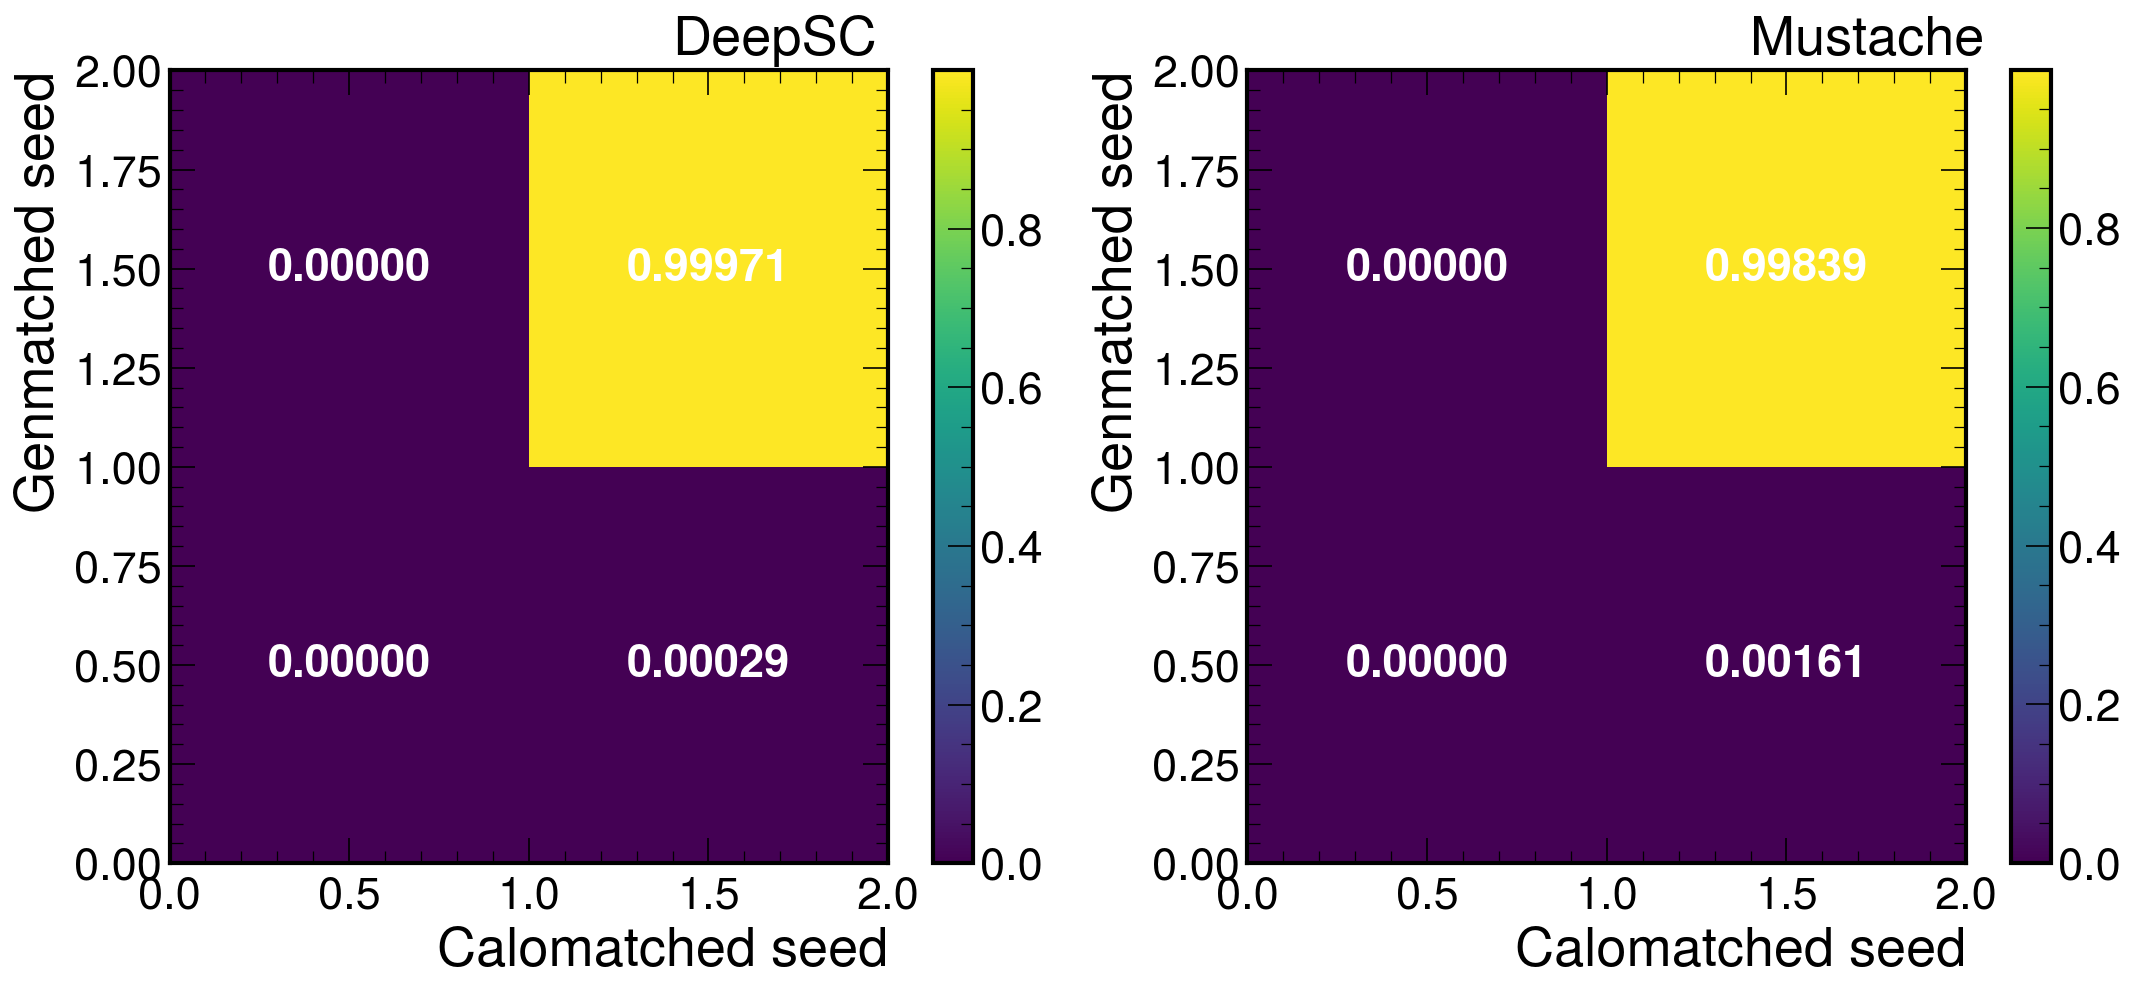

In [7]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, (df,flavour) in enumerate(zip([df_d, df_m],["DeepSC", "Mustache"])):

    hist, xbins, ybins, C = ax[f].hist2d(df.calomatched, df.genmatched,
                                         range=((0,2),(0,2)), bins=(2,2), density=True)
    for i in range(2):
        for j in range(2):
            ax[f].text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                    color="w", ha="center", va="center", fontweight="bold", fontsize="small")
    
    fig.colorbar(C,ax=ax[f])
    ax[f].text(0.7, 1.02, flavour,  transform=ax[f].transAxes)
    ax[f].set_xlabel("Calomatched seed")
    ax[f].set_ylabel("Genmatched seed")

In [59]:
#Gen level comparison

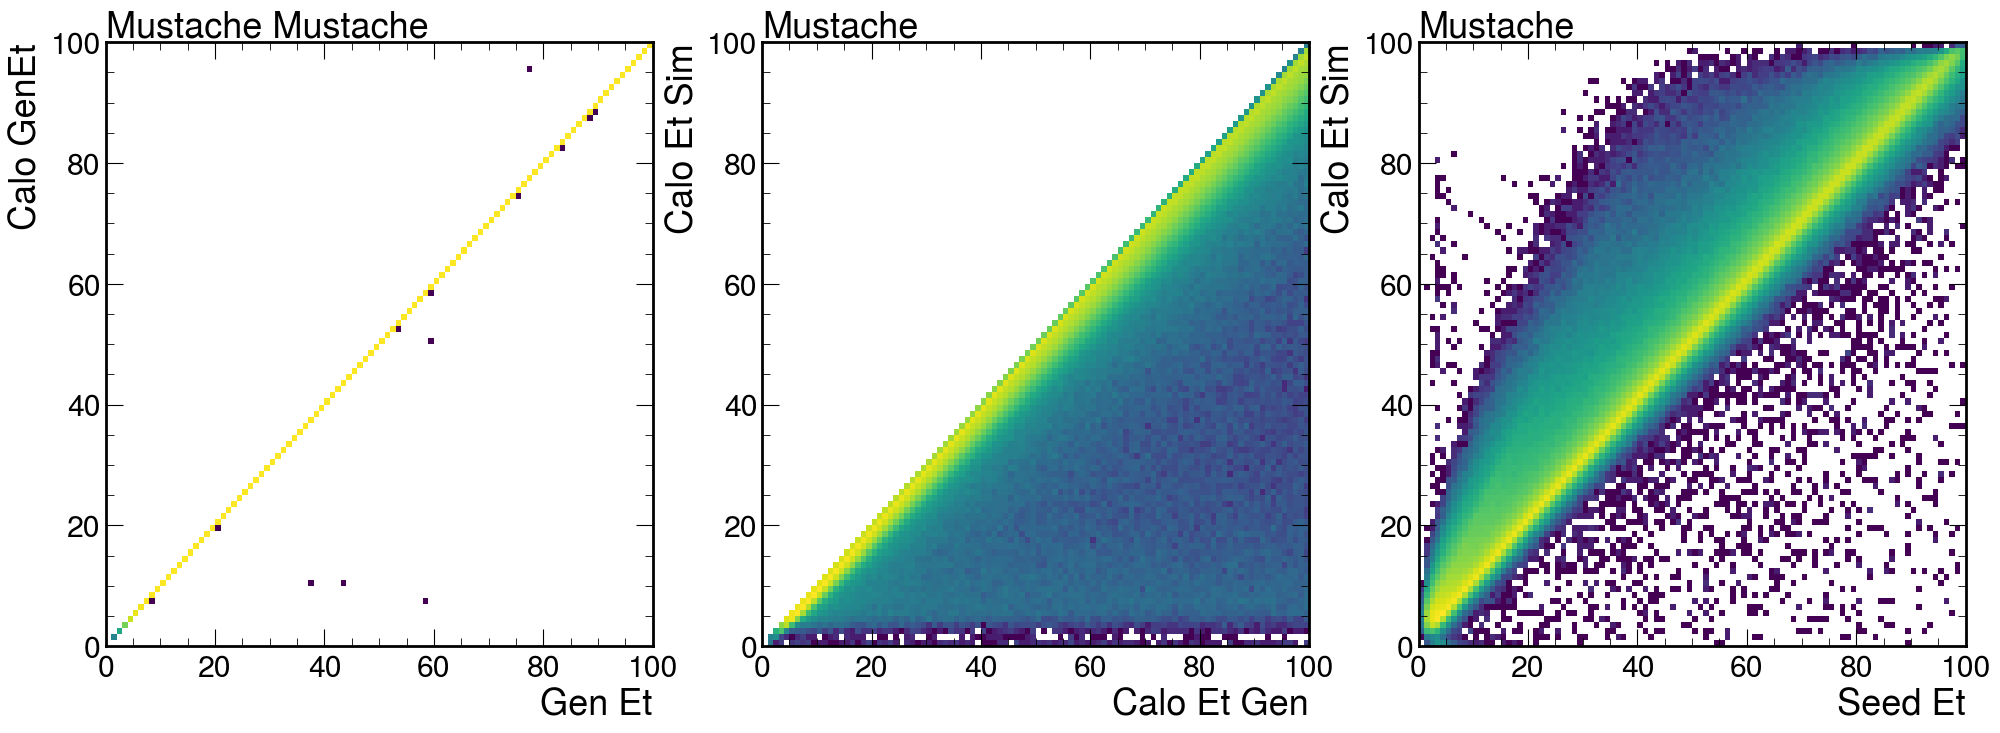

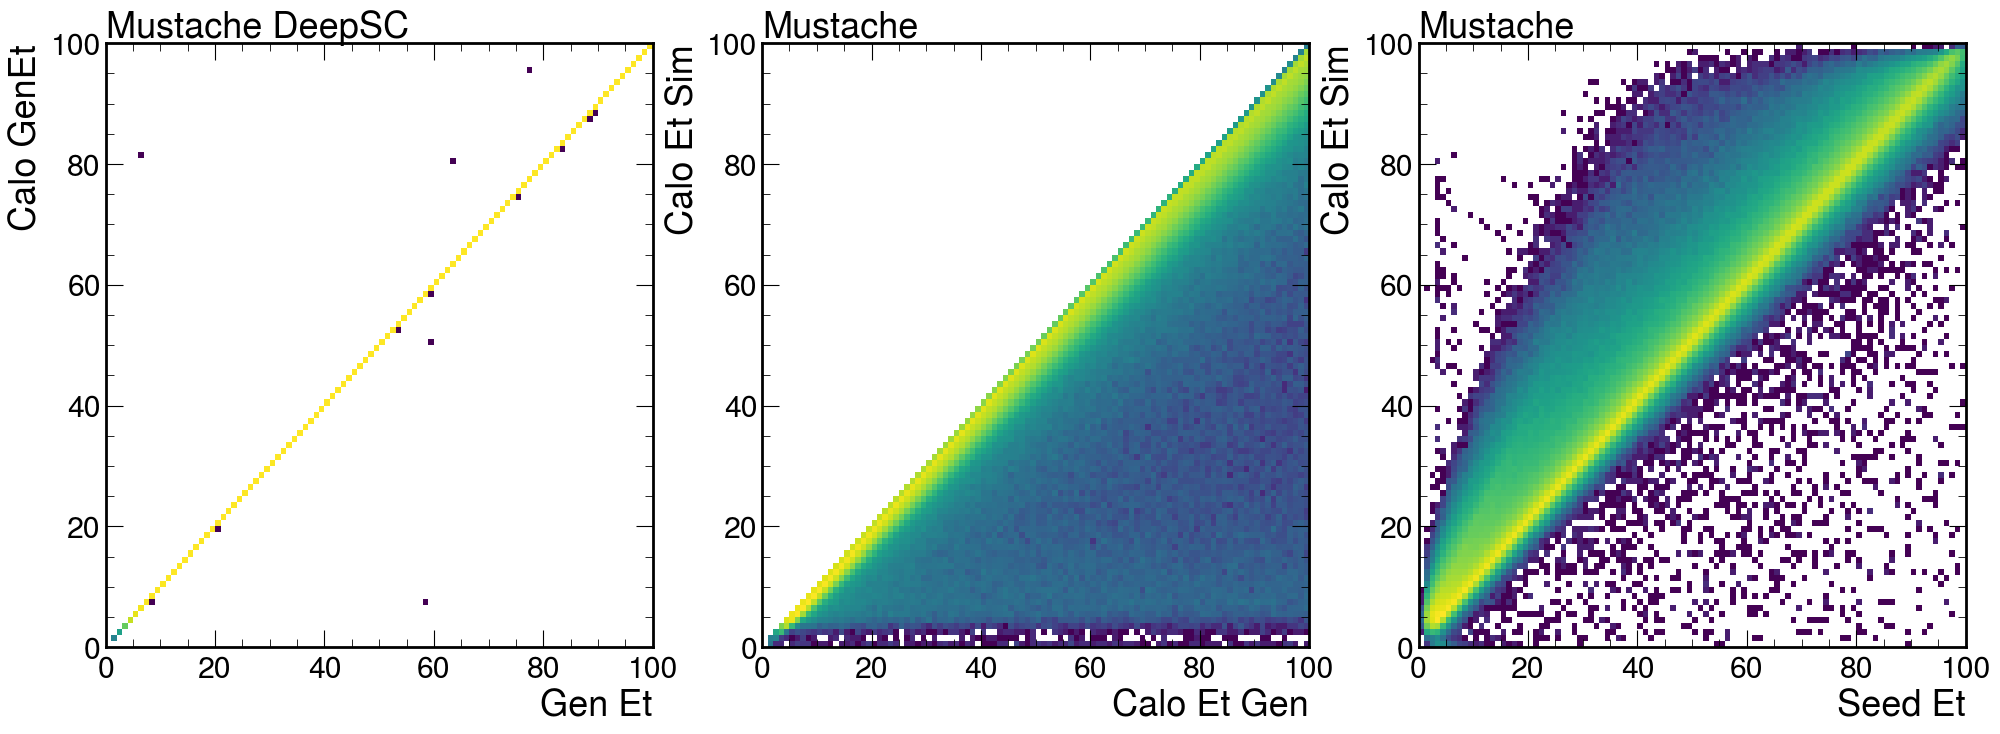

In [35]:
for df,label in zip([df_m, df_d],["Mustache", "DeepSC"]):
    fig, (ax,ay,az) = plt.subplots(1,3, figsize=(24,8), dpi=100)
    ax.hist2d(df.genpart_et,df.calo_et_gen, bins=(100,100), range=((0,100),(0,100)), norm=colors.LogNorm())
    ax.set_xlabel("Gen Et")
    ax.set_ylabel("Calo GenEt")
    ax.text(0., 1.01, flavour+ " "+label, transform=ax.transAxes)

    ay.hist2d(df.calo_et_gen,df.calo_et_sim, bins=(100,100), range=((0,100),(0,100)), norm=colors.LogNorm())
    ay.set_xlabel("Calo Et Gen")
    ay.set_ylabel("Calo Et Sim")
    ay.text(0., 1.01, flavour, transform=ay.transAxes)

    az.hist2d(df.et_seed ,df.calo_et_sim, bins=(100,100), range=((0,100),(0,100)), norm=colors.LogNorm())
    az.set_xlabel("Seed Et")
    az.set_ylabel("Calo Et Sim")
    az.text(0., 1.01, flavour, transform=az.transAxes)

In [ ]:
flavour = "Electrons"

for df,label in zip([df_m, df_d],["Mustache", "DeepSC"]):
    m = (df.calomatched==1)&(df.genmatched==1)
    fig, (ax,ay) = plt.subplots(1,2, figsize=(17,8), dpi=100)
    ax.hist2d(df[m].calo_et_gen,df[m].calo_et_sim, bins=(100,100), range=((0,100),(0,100)), norm=colors.LogNorm())
    ax.set_xlabel("Et Gen True (calo)")
    ax.set_ylabel("Et Sim True (calo)")
    ax.text(0., 1.01, flavour+ " + "+label, transform=ax.transAxes)

    ay.hist2d(df[m].et_sc_raw,df[m].calo_et_sim, bins=(100,100), range=((0,100),(0,100)), norm=colors.LogNorm())
    ay.set_xlabel("Et RAW selected")
    ay.set_ylabel("Et Sim True (calo)")
    ay.text(0., 1.01, flavour+ " + "+label, transform=ay.transAxes)


### Eta-phi check

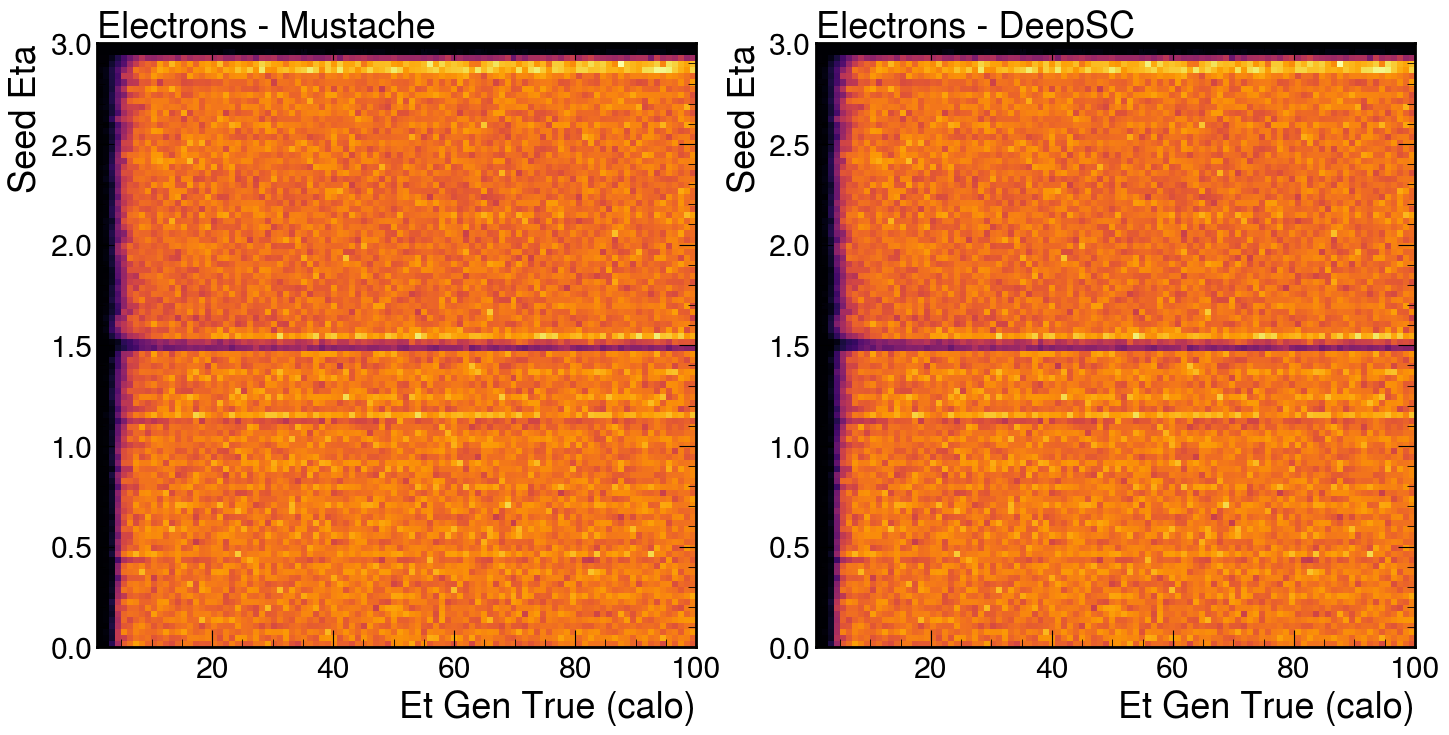

In [8]:
flavour = "Electrons"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m, df_d],["Mustache", "DeepSC"])):
    m = (df.calomatched==1)&(df.genmatched==1)
    
    ax[i].hist2d(df[m].calo_et_gen,df[m].seed_eta.abs(),range=((1,100),(0,3)), bins=(100,100), density=True, cmap="inferno")
    ax[i].set_xlabel("Et Gen True (calo)")
    ax[i].set_ylabel("Seed Eta")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


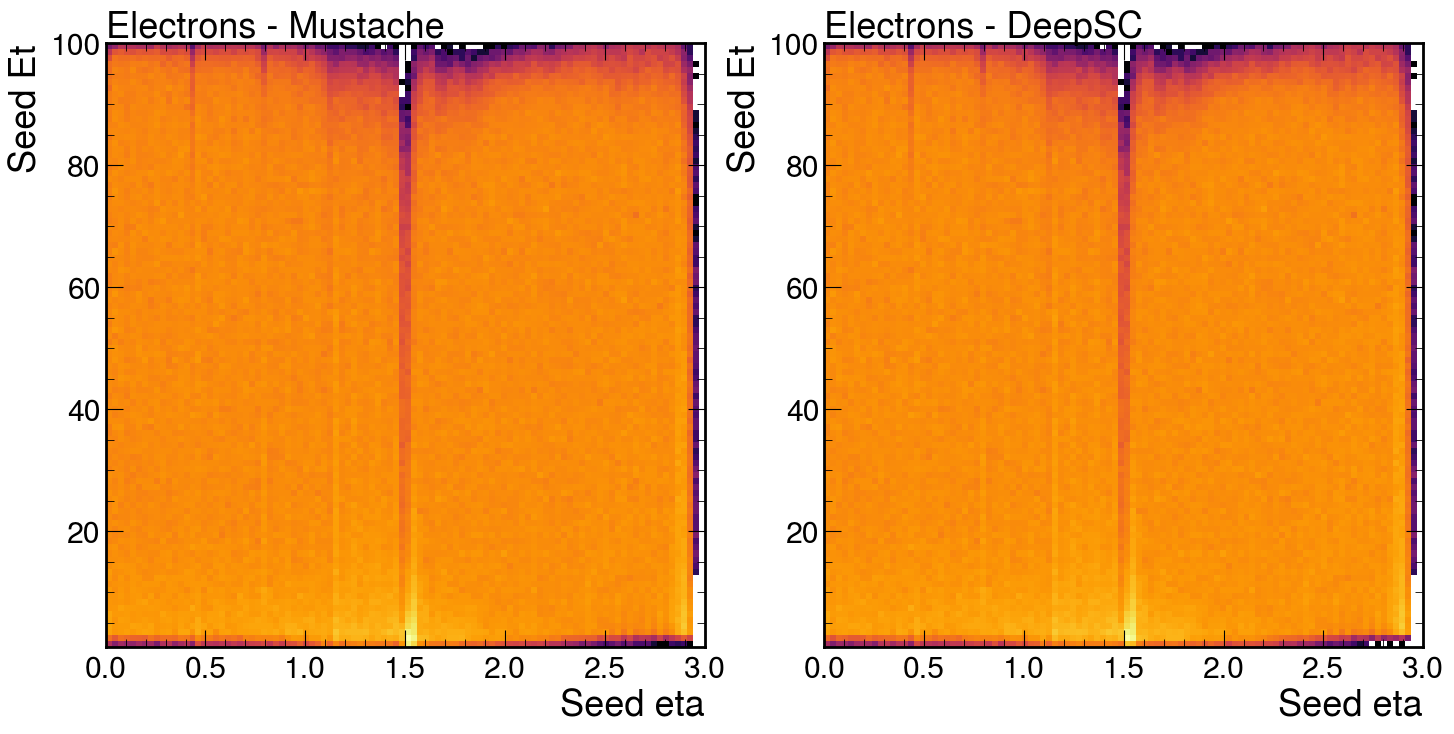

In [9]:
flavour = "Electrons"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m, df_d],["Mustache", "DeepSC"])):
    m = (df.calomatched==1)&(df.genmatched==1)
    
    ax[i].hist2d(df[m].seed_eta.abs(),df[m].et_seed,range=((0,3),(1,100)), bins=(100,100), density=True, cmap="inferno", 
                norm=colors.LogNorm())
    ax[i].set_xlabel("Seed eta")
    ax[i].set_ylabel("Seed Et")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


# Energy resolution analysis

In [10]:
def bin_analysis(col):
    def f(df):
        m = df[col].mean()
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.975) - df[col].quantile(0.025))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

def bin_analysis_details(col):
    def f(df):
        m = df[col].mean()
        qu = df[col].quantile(0.84)
        qd = df[col].quantile(0.16)
        A = (qu - qd)/2
        quu = df[col].quantile(0.975)
        qdd = df[col].quantile(0.025)
        B = (quu- qdd )/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "w68_u": qu,
            "w68_d": qd,
            "w95_u" : quu,
            "w95_d" : qdd,
            "N": df[col].count()
        })
    return f


def get_quantiles(df):
    return df.quantile(0.025), df.quantile(0.16), df.quantile(0.5), df.quantile(0.84), df.quantile(0.975)



def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

from numba import jit

#@jit(nopython=True)
def get_central_smallest_interval(df, xrange, nbins, Ntrial=10000):
    H = np.histogram(df, bins=nbins, range=xrange)
    
    #xx = movingaverage(H[0], 10)
    
    xmax = H[1][np.argmax(H[0])]
    
    #xmax = np.mean(df[(df>=xrange[0]) & (df<xrange[1])])
    deltax = (xrange[1]-xrange[0])/(2*Ntrial)
    
    N = df.size
    xd = xmax-deltax
    xu = xmax+deltax
    for i in range(Ntrial):
        q = np.sum((df>xd) &(df<xu))/ N
        if q>=0.68: 
            break
        xd = xd-deltax
        xu = xu+deltax
    return xmax, xd, xu

def bin_analysis_central_smallest(col, xrange=(0.6, 1.2), nbins=200, Ntrial =10000):
    def f(df):
        data = df[col]
        xmax, qd, qu = get_central_smallest_interval(data.values, xrange=xrange, nbins=nbins, Ntrial =Ntrial )
        return pd.Series({
            "m": xmax,
            "w68": (qu-qd)/2,
            "w68_u": qu,
            "w68_d": qd,
            "N": df[col].count()
        })
    return f

### Inclusive plots

Text(1, 0, 'ET raw/Gen')

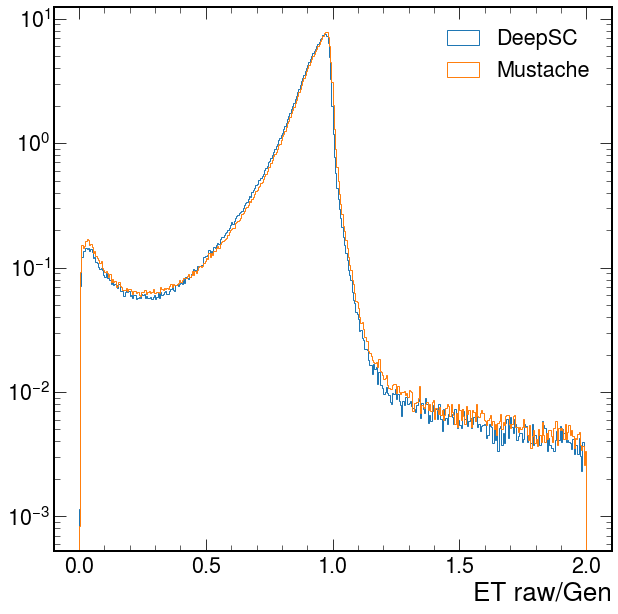

In [18]:
plt.hist(df_d_mgen.Eraw_ov_EGen, bins=400, range=(0,2), label="DeepSC", histtype="step", density=True)
plt.hist(df_m_mgen.Eraw_ov_EGen, bins=400, range=(0,2), label="Mustache", histtype="step", density=True)
plt.legend()
plt.yscale("log")
plt.xlabel("ET raw/Gen")

Text(1, 0, 'ET raw/Gen')

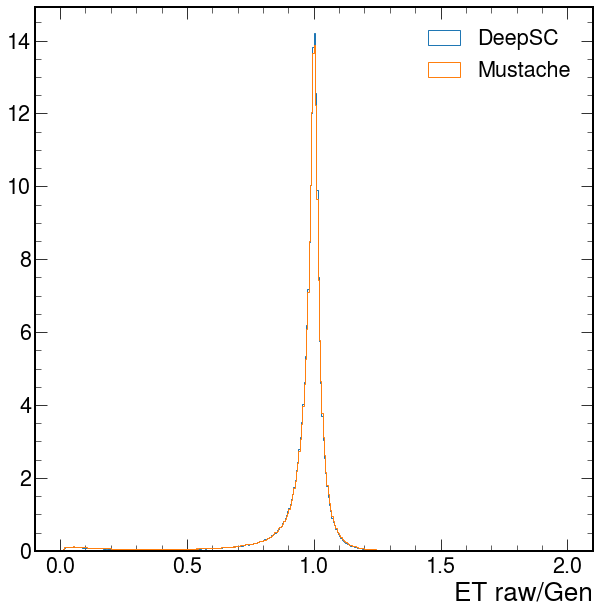

In [20]:
plt.hist(df_d_mgen.Ecorr_ov_EGen, bins=400, range=(0,2), label="DeepSC", histtype="step", density=True)
plt.hist(df_m_mgen.Ecorr_ov_EGen, bins=400, range=(0,2), label="Mustache", histtype="step", density=True)
plt.legend()
#plt.yscale("log")
plt.xlabel("ET raw/Gen")

### Checks on collected energies

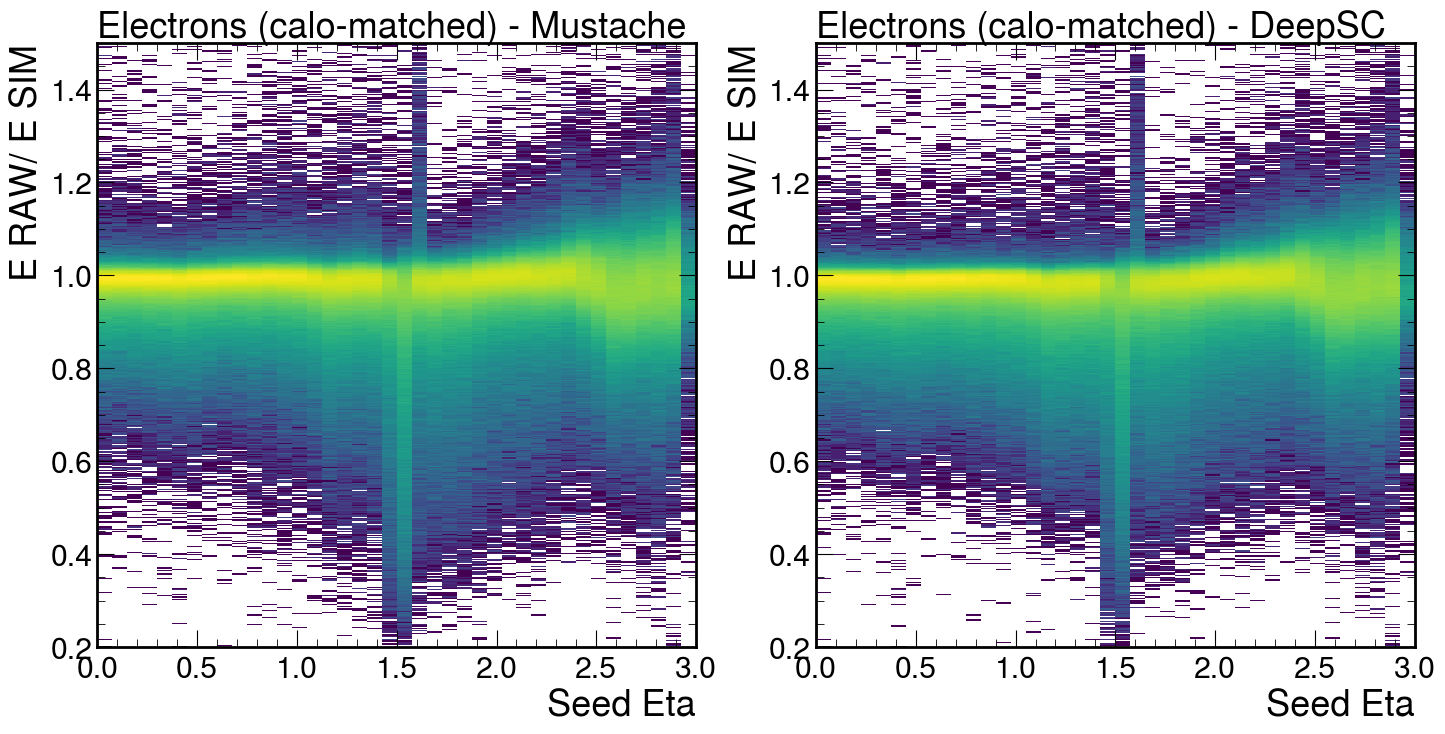

In [21]:
flavour = "Electrons (calo-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m_msim, df_d_msim],["Mustache", "DeepSC"])):
    
    ax[i].hist2d(df.seed_eta.abs(),df.Eraw_ov_Esim, bins=(40,500), range=((0,3),(0.2,1.5)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Eta")
    ax[i].set_ylabel("E RAW/ E SIM")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


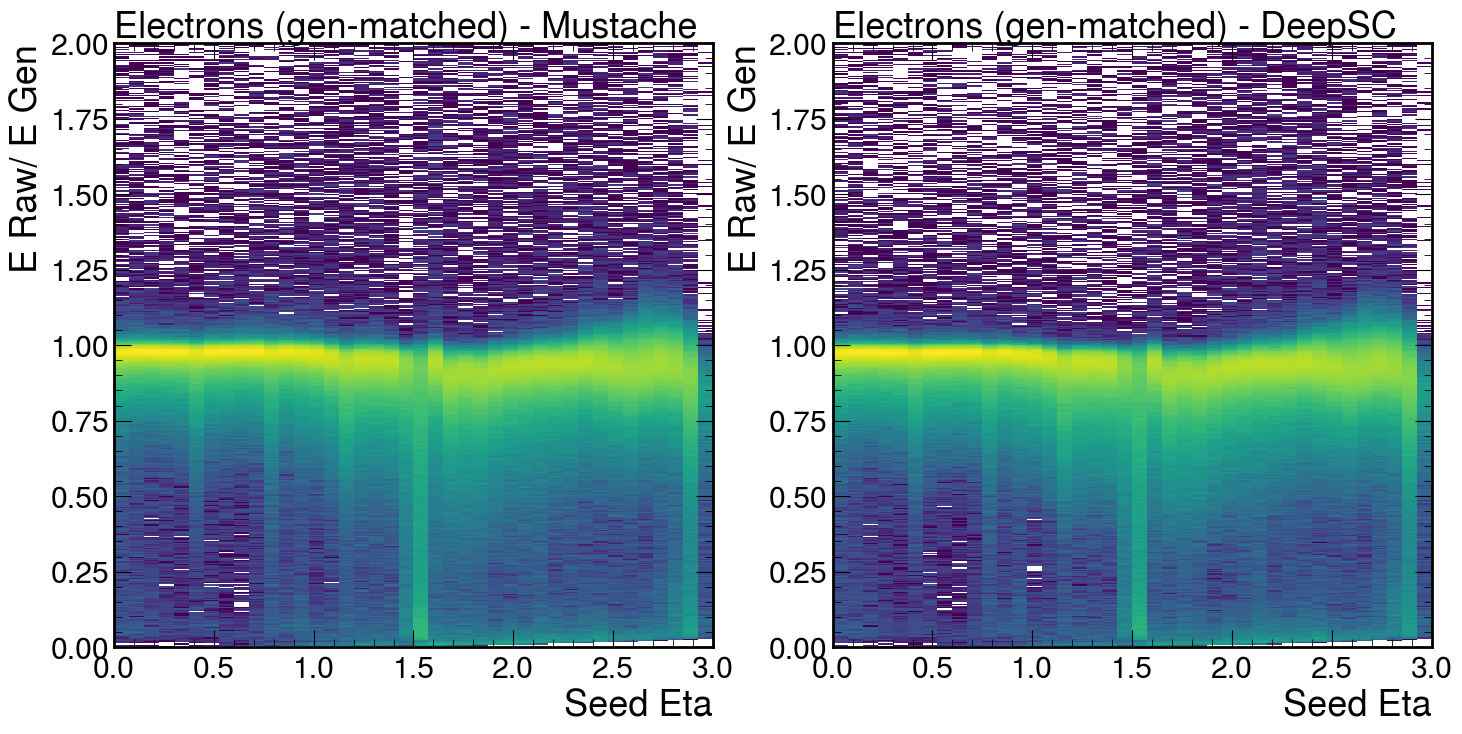

In [22]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m_mgen, df_d_mgen],["Mustache", "DeepSC"])):
    
    ax[i].hist2d(df.seed_eta.abs(),df.Eraw_ov_EGen, bins=(40,500), range=((0,3),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Eta")
    ax[i].set_ylabel("E Raw/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


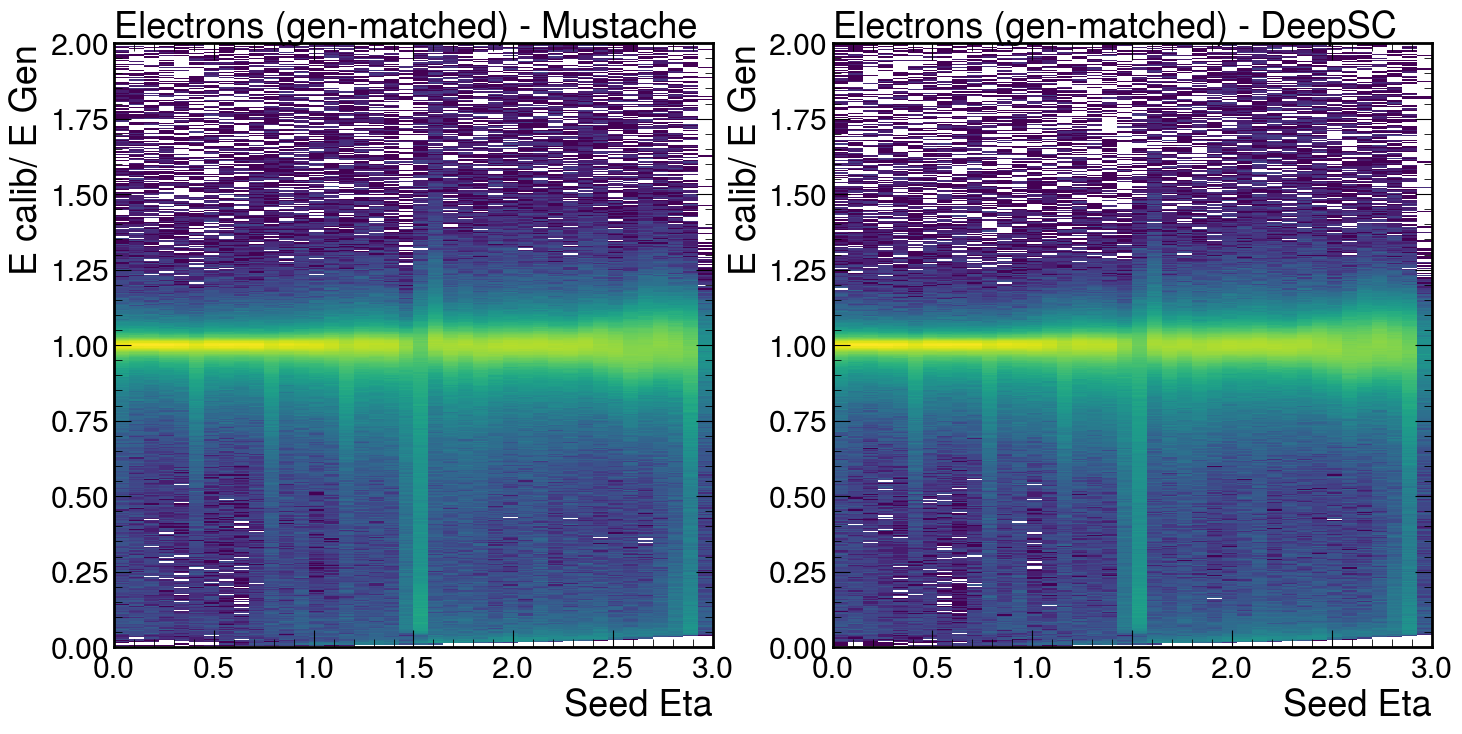

In [23]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m_mgen, df_d_mgen],["Mustache", "DeepSC"])):
    
    ax[i].hist2d(df.seed_eta.abs(),df.Ecorr_ov_EGen, bins=(40,500), range=((0,3),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Eta")
    ax[i].set_ylabel("E calib/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


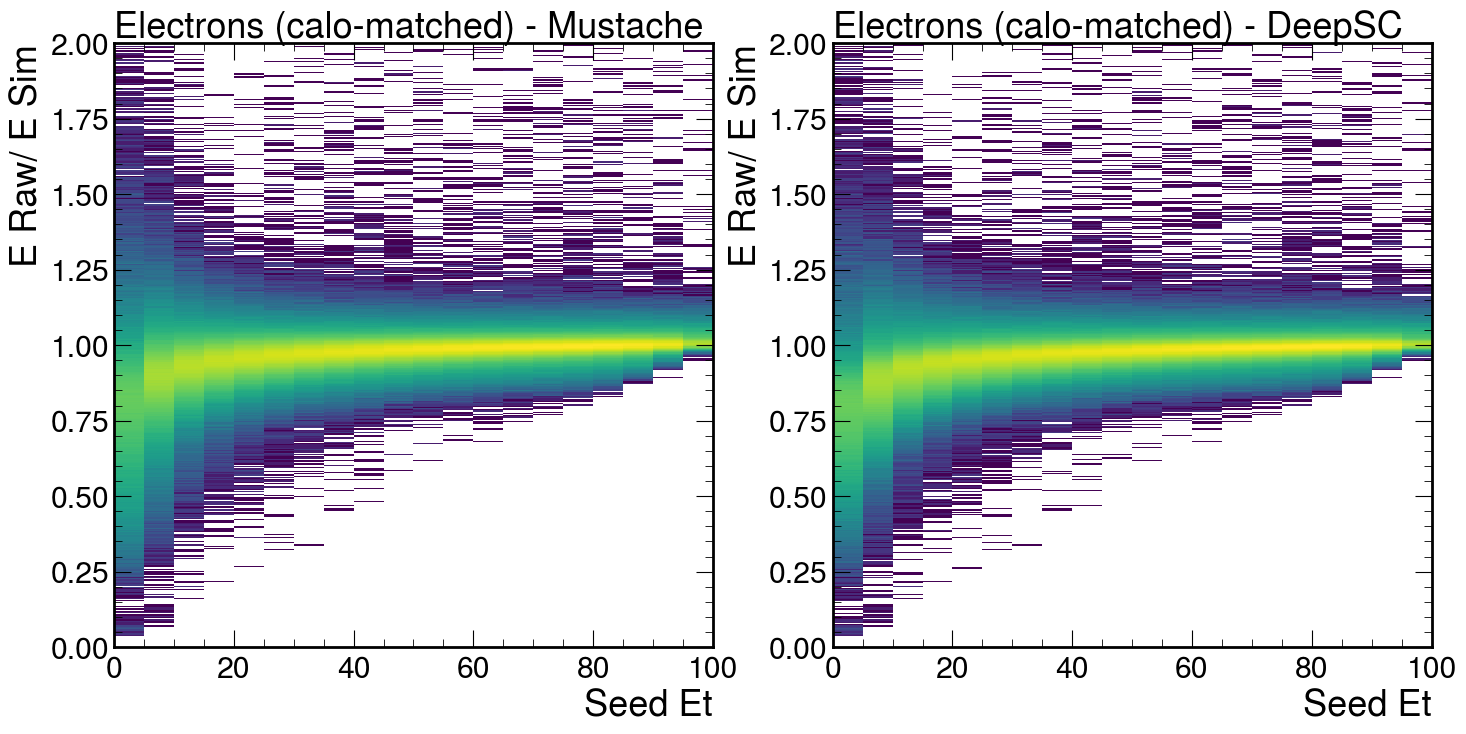

In [24]:
flavour = "Electrons (calo-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m_msim, df_d_msim],["Mustache", "DeepSC"])):
    
    ax[i].hist2d(df.et_seed,df.Eraw_ov_Esim, bins=(20,500), range=((0,100),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Et")
    ax[i].set_ylabel("E Raw/ E Sim")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


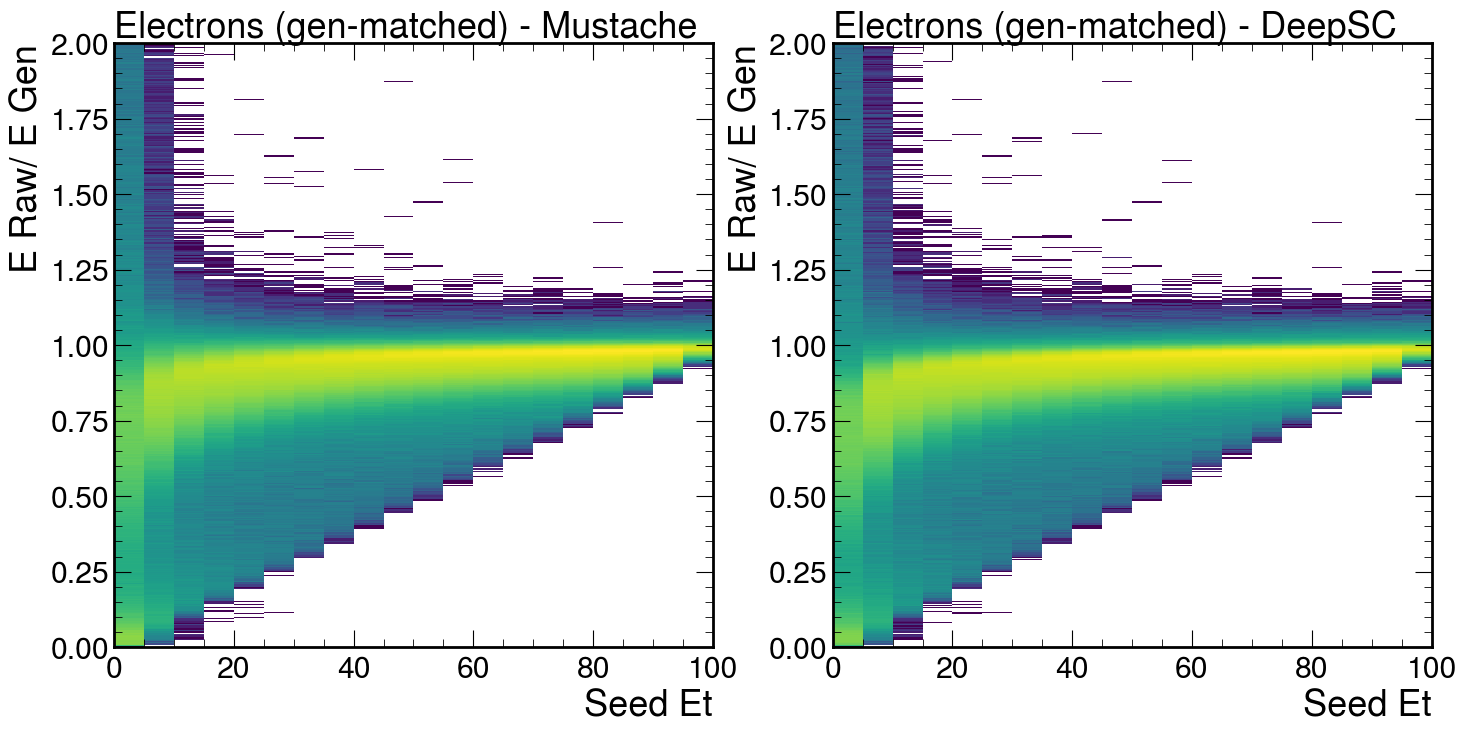

In [25]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m_mgen, df_d_mgen],["Mustache", "DeepSC"])):
    
    ax[i].hist2d(df.et_seed,df.Eraw_ov_EGen, bins=(20,500), range=((0,100),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Et")
    ax[i].set_ylabel("E Raw/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


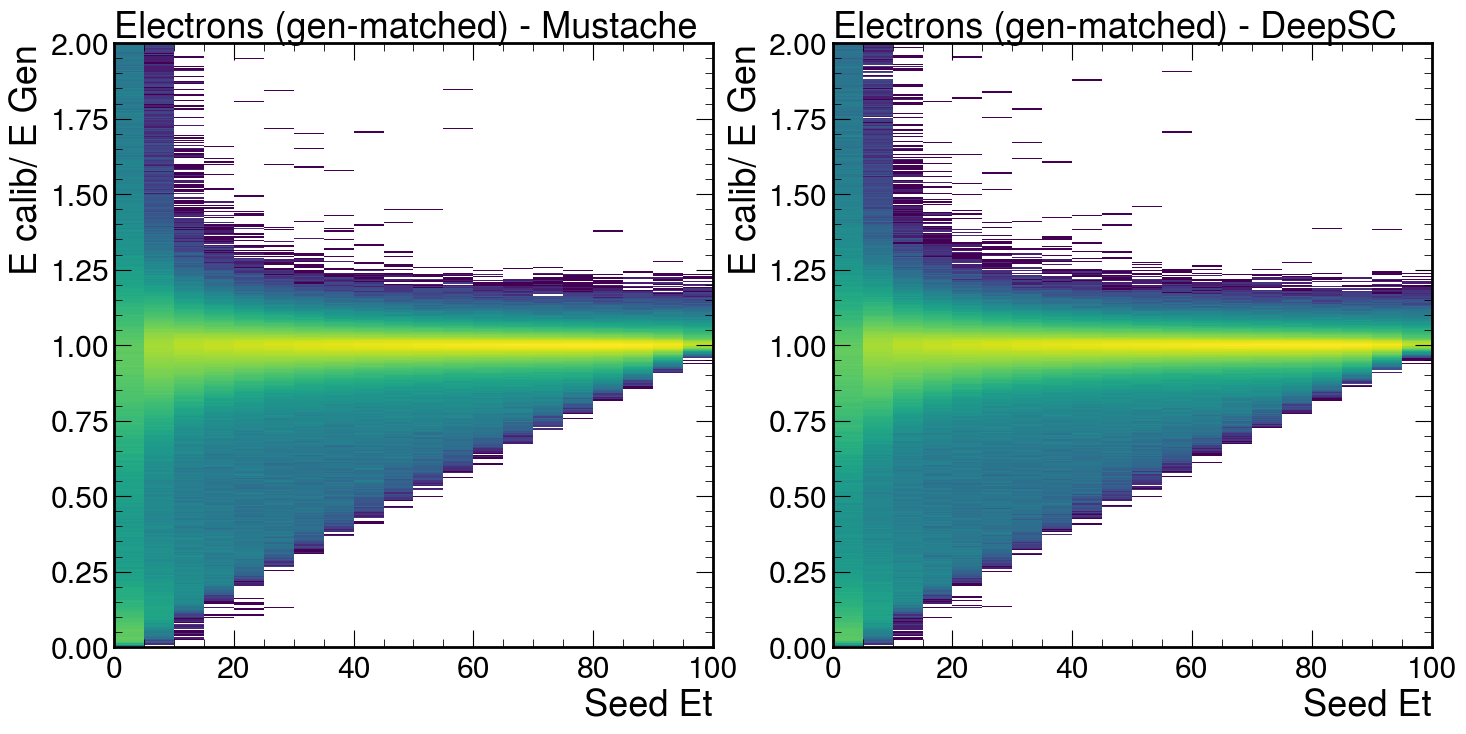

In [26]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (df,label) in enumerate(zip([df_m_mgen, df_d_mgen],["Mustache", "DeepSC"])):
    
    ax[i].hist2d(df.et_seed,df.Ecorr_ov_EGen, bins=(20,500), range=((0,100),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Et")
    ax[i].set_ylabel("E calib/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


## Resolution plots

/tmp/ipykernel_514/3145078129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_514/3145078129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


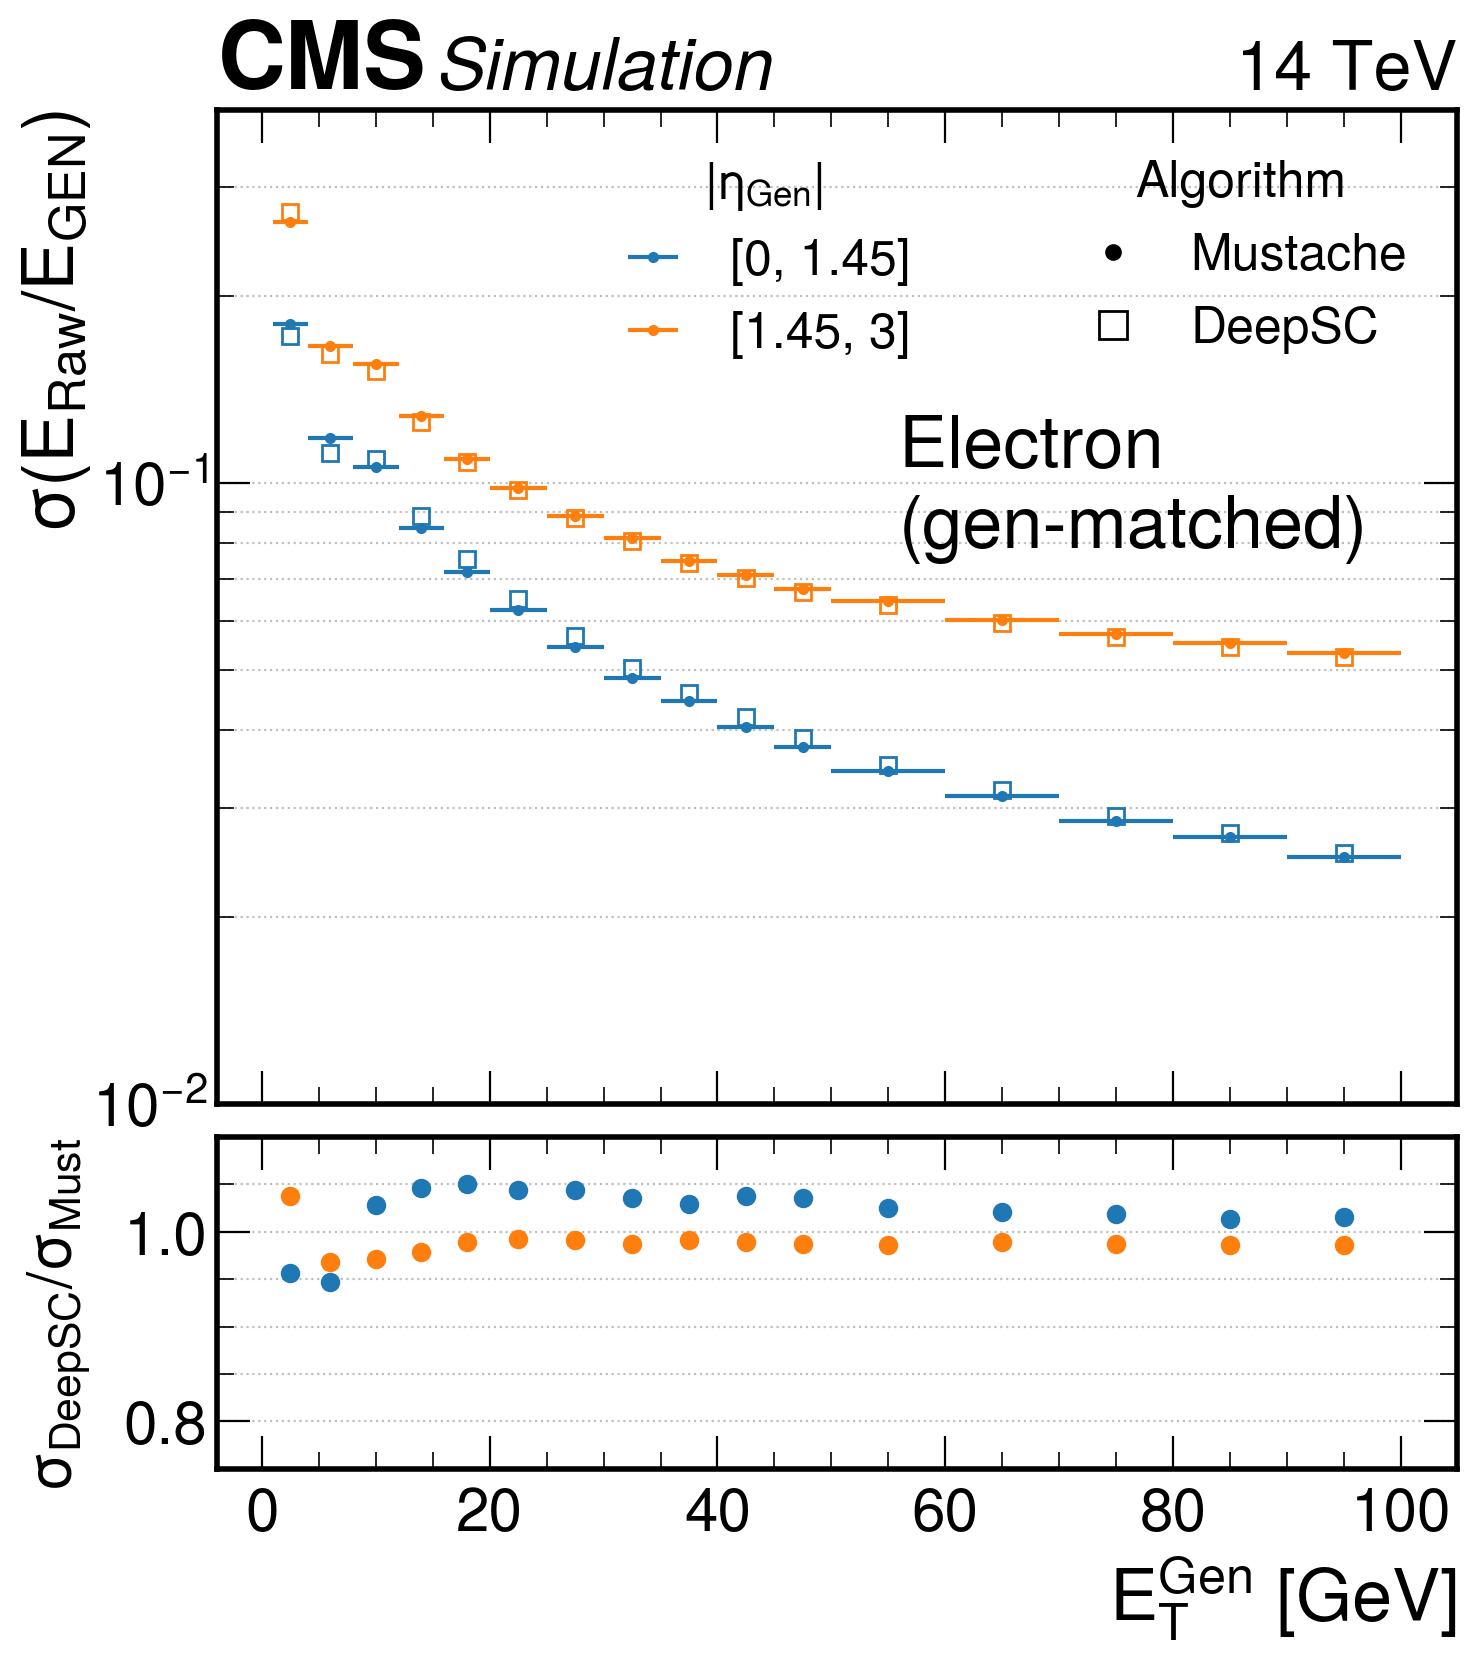

In [24]:
ets = [1, 4, 8, 12, 16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.45, 3]
for df in [df_m_mgen, df_d_mgen]:
    df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))

name = "ele_gen_matched_raw"
flavour  = "Electron \n(gen-matched)"

res = df_d_mgen.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ov_EGen"))
res_must = df_m_mgen.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ov_EGen"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{GEN})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.75, 1.10)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.56, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(name))

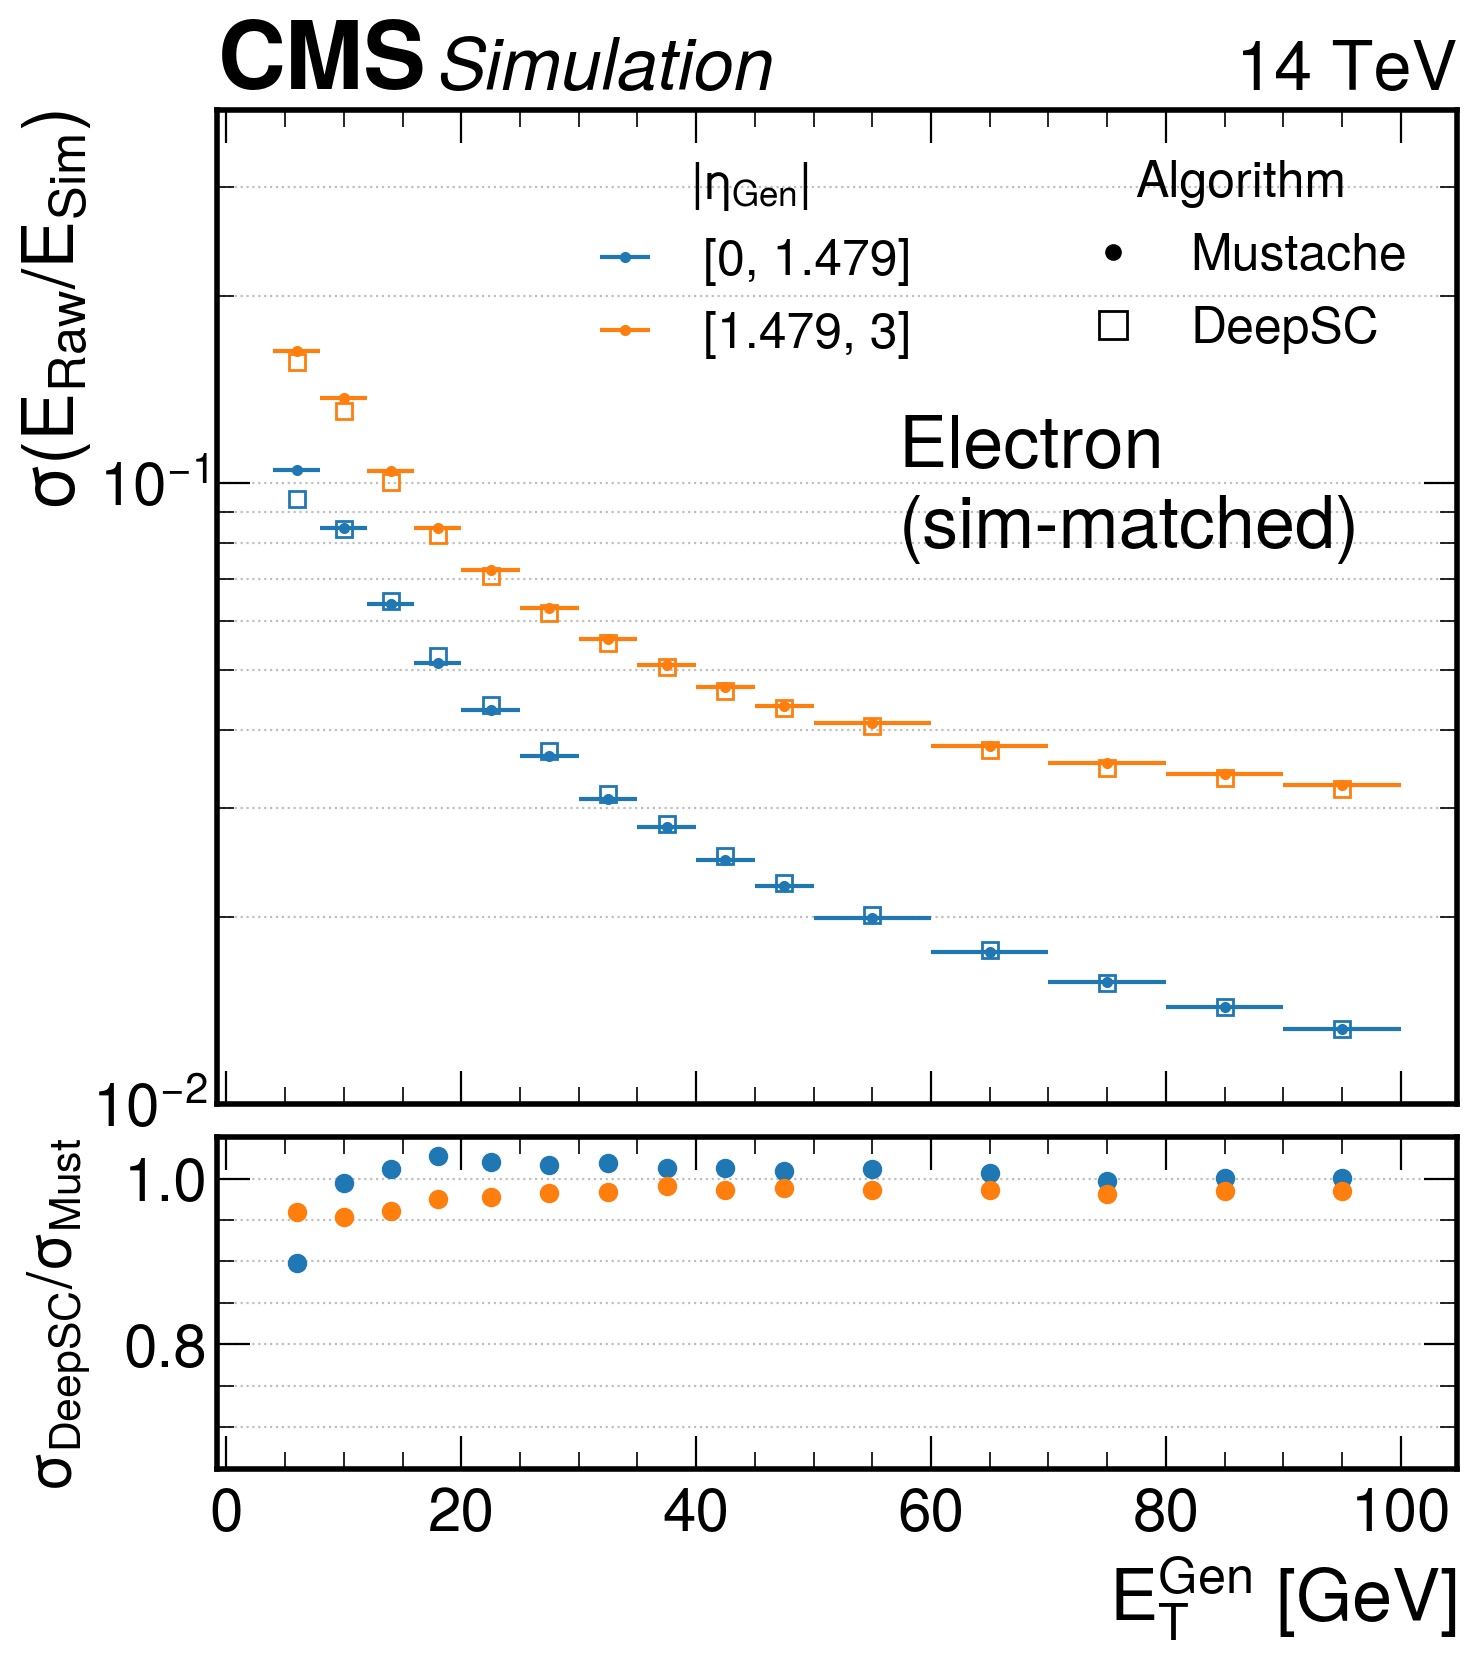

In [25]:
ets = [4, 8, 12,16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.479, 3]

for df in [df_m, df_d]:
    df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))

name = "ele_sim_matched_raw"
flavour  = "Electron \n(sim-matched)"
# Eta restrinction
etaEB, etaEE = 1.485, 1.566
res = df_d[(df_d.calomatched==1)].groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ov_Esim"))
res_must = df_m[(df_m.calomatched==1)].groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ov_Esim"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.65, 1.05)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.56, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(name))

# Plot with calibration

/tmp/ipykernel_514/1924890644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_514/1924890644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


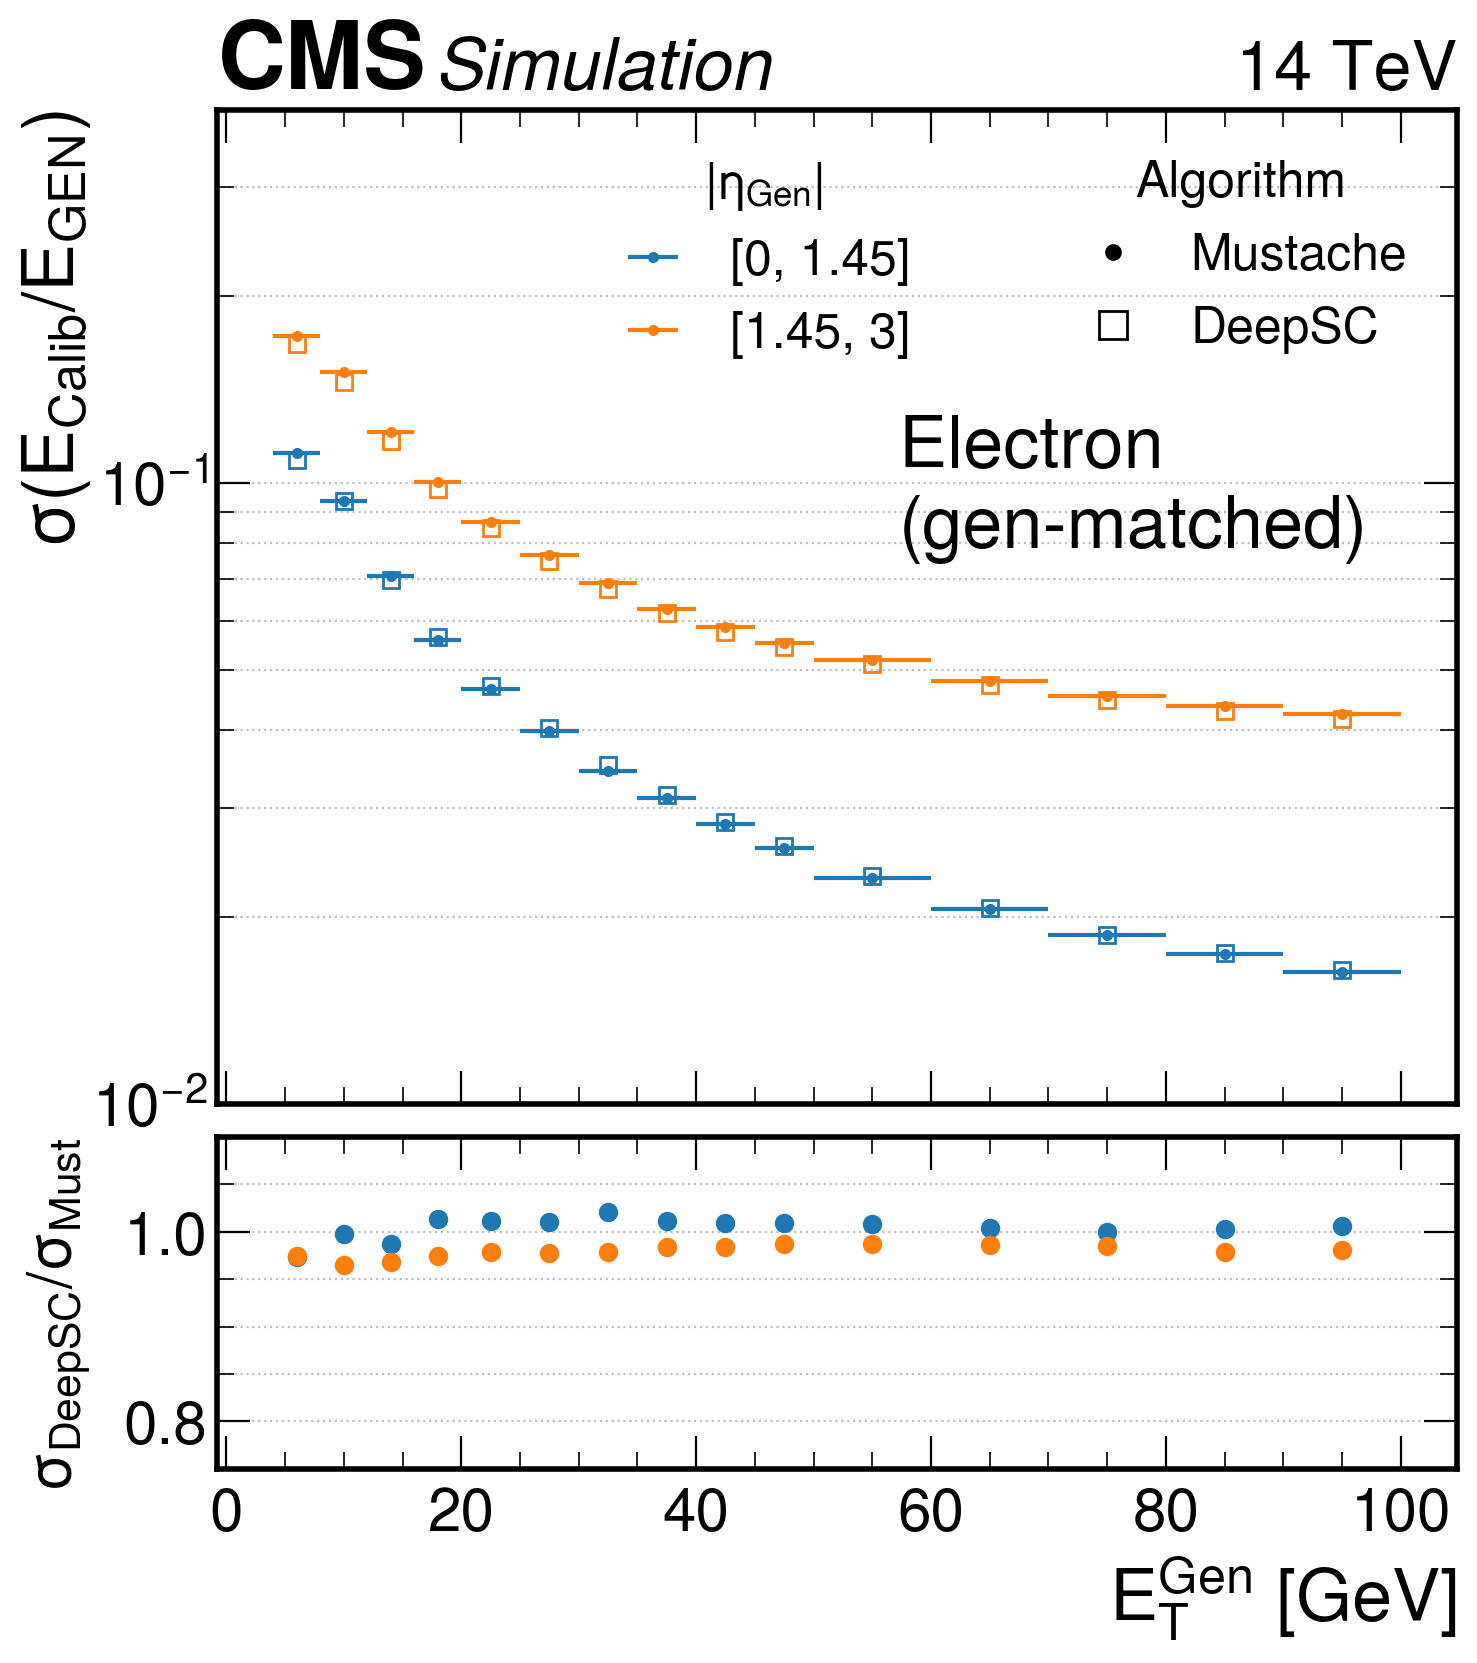

In [26]:
ets = [ 4, 8, 12, 16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.45, 3]
for df in [df_m_mgen, df_d_mgen]:
    df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))

name = "ele_gen_matched_corr"
flavour  = "Electron \n(gen-matched)"

res = df_d_mgen.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Ecorr_ov_EGen"))
res_must = df_m_mgen.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Ecorr_ov_EGen"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Calib}/E_{GEN})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.75, 1.10)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.56, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(name))

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation'))

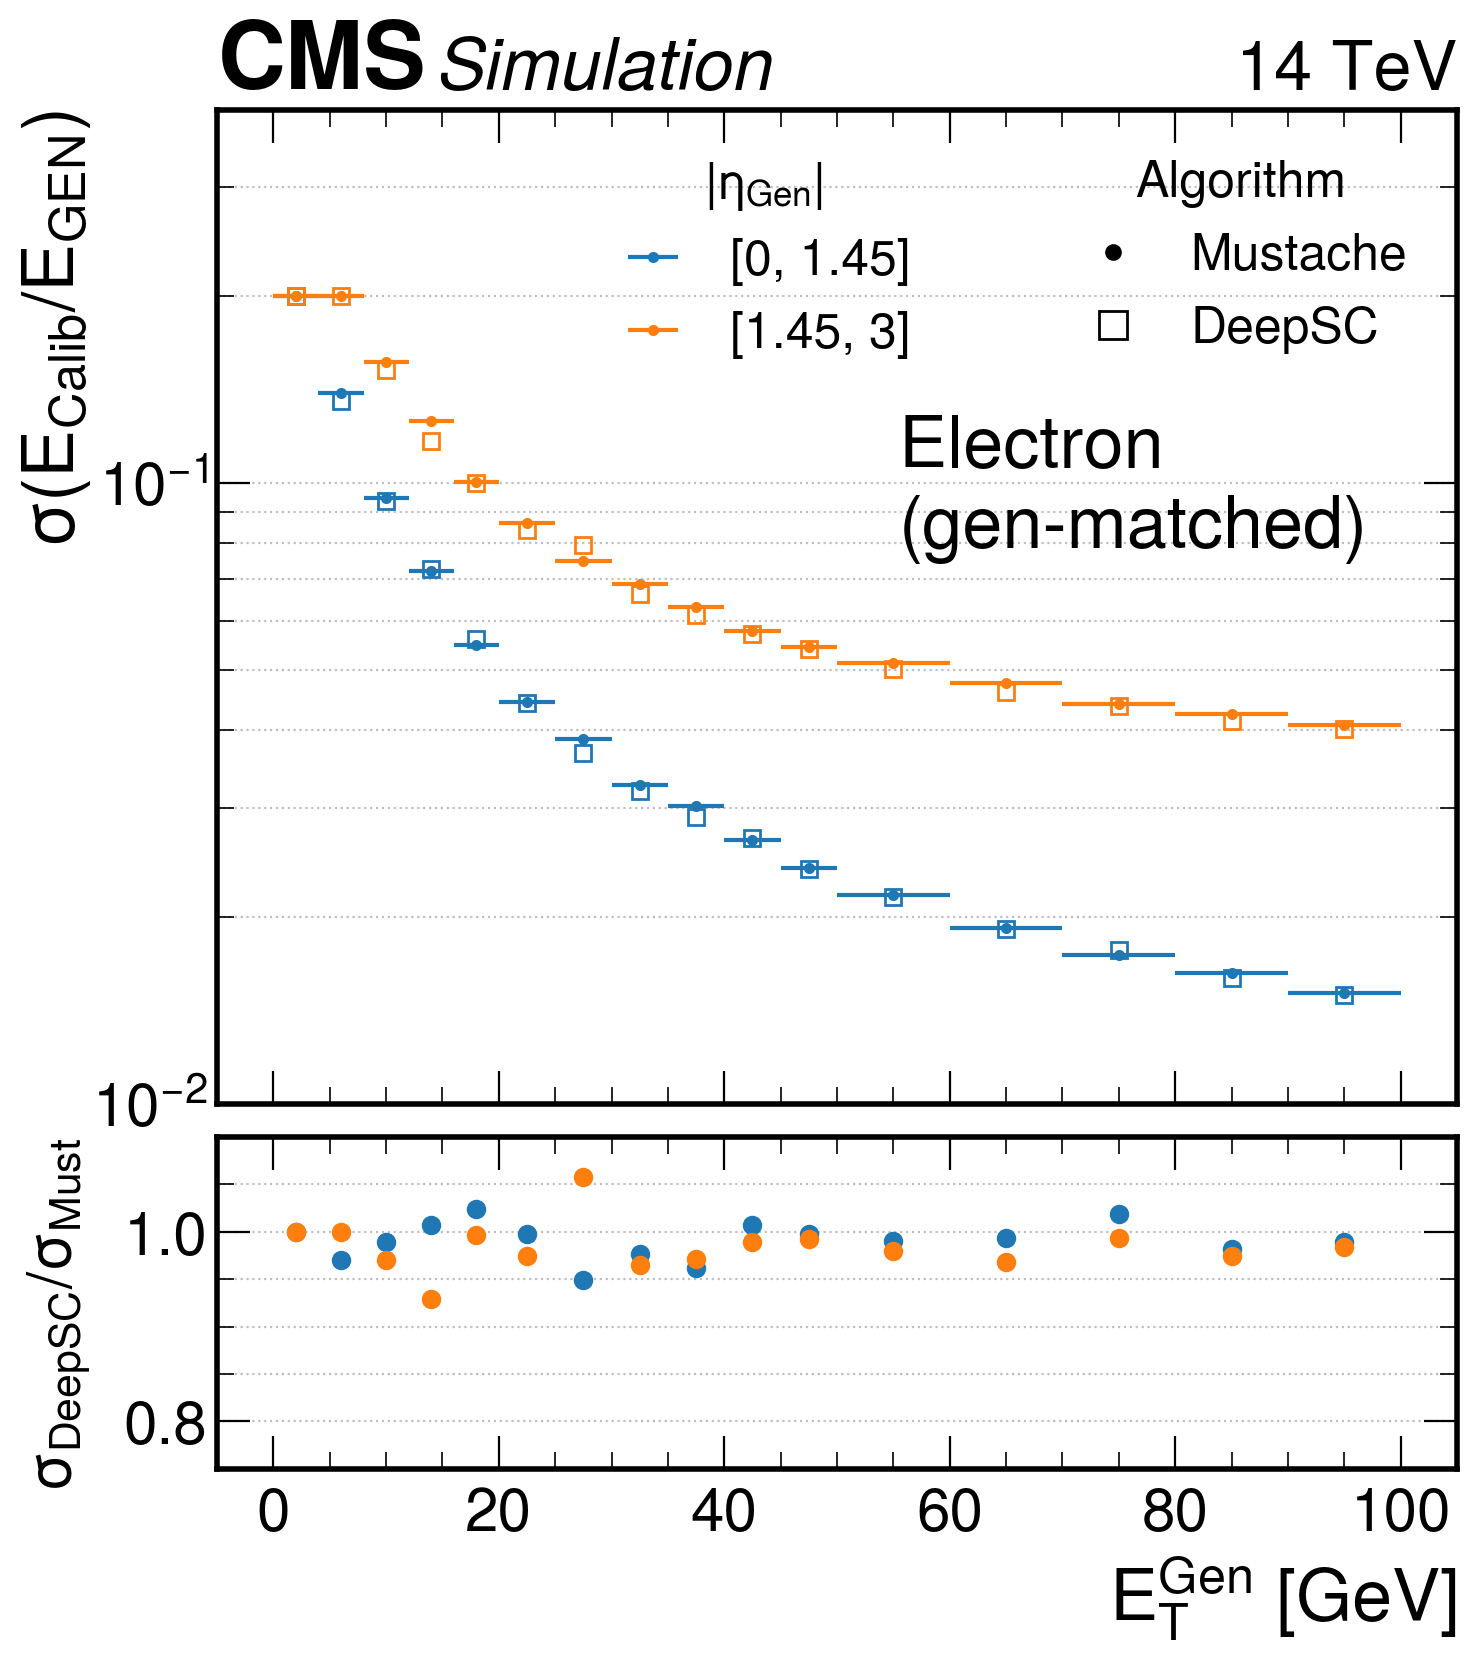

In [30]:
ets =  [0, 4, 8, 12, 16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.45, 3]


for df in [df_m_mgen, df_d_mgen]:
    df.loc[:,"et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
    df.loc[:,"eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))

flavour  = "Electron \n(gen-matched)"

res = df_d_mgen.groupby(["et_bin","eta_bin"]).apply(
    bin_analysis_central_smallest("Ecorr_ov_EGen",xrange=(0.8, 1.2), nbins=200))
res_must = df_m_mgen.groupby(["et_bin","eta_bin"]).apply(
    bin_analysis_central_smallest("Ecorr_ov_EGen",xrange=(0.8, 1.2), nbins=200))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Calib}/E_{GEN})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.75, 1.10)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.56, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(flavour))

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.8, 1.2)
bins= 800
flavour = "$E_{calib}/E_{GEN}$"
var = "Ecorr_ov_EGen"

r = [4, 6, 8, 10, 15, 30 ,40, 60,100]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx_must = df_m_mgen[(df_m_mgen.genpart_et>=e1) & (df_m_mgen.genpart_et<e2) & (df_d_mgen.seed_eta.abs()< 1.45) ]
        dfx_deep = df_d_mgen[(df_d_mgen.genpart_et>=e1)  & (df_d_mgen.genpart_et<e2) & (df_d_mgen.seed_eta.abs()< 1.45)]
        
        a, d,u  = get_central_smallest_interval(dfx_deep[var].values, xrange=(0.8,1.2), nbins=300)
        a_m, d_m,u_m = get_central_smallest_interval(dfx_must[var].values, xrange=(0.8,1.2), nbins=300)
        
        ax[j,i].hist(df_m_mgen[var],bins=bins, range=xrange,histtype='step', linewidth=2,
                     label='Mustache {:.3f} $\sigma$ 68%'.format((d_m -u_m)/2))
        A= ax[j,i].hist(df_d_mgen[var],bins=bins, range=xrange,histtype='step',
                        linewidth=2, label='DeepSC {:.3f} $\sigma$ 68%'.format((d-u)/2))
        maxY = np.max(A[0])
        
        ax[j,i].plot([a,a],[0,maxY], color="red", linewidth=2)
        ax[j,i].plot([a_m,a_m],[0,maxY], color="blue", linewidth=2, linestyle='dashed')
        ax[j,i].plot([u,u],[0,maxY], color="red", linewidth=2)
        ax[j,i].plot([d,d],[0,maxY], color="red", linewidth=2)
        ax[j,i].plot([u_m,u_m],[0,maxY], color="blue", linewidth=2, linestyle='dashed')
        ax[j,i].plot([d_m,d_m],[0,maxY], color="blue", linewidth=2, linestyle='dashed')
    
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_ylim(1, 1.5 * maxY)
        ax[j,i].set_xlabel(flavour)
        ax[j,i].text(0.07,0.64,  str(e1) + ' < Seed $E_T$ < ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.07, 0.8, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


CPU times: user 330 ms, sys: 220 µs, total: 330 ms
Wall time: 334 ms
0.988 0.8764900000000948 1.0995099999999052
0.11150999999990518
CPU times: user 341 ms, sys: 119 µs, total: 341 ms
Wall time: 344 ms
0.994 0.8807500000000963 1.1072499999999037
0.1132499999999037
0.984635761589404


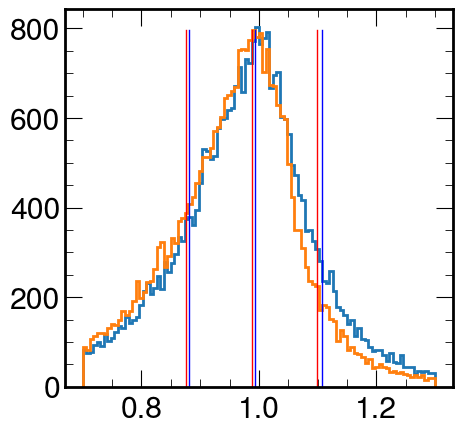

In [15]:
xrange = (0.7,1.3)
bins= 100
var = "Ecorr_ov_EGen"
emin = 4
emax = 8

dfx_must = df_m_mgen[(df_m_mgen.genpart_et>=emin) & (df_m_mgen.genpart_et<emax) & (abs(df_m_mgen.seed_eta)<1.47) ]
dfx_deep = df_d_mgen[(df_d_mgen.genpart_et>=emin)  & (df_d_mgen.genpart_et<emax)& (abs(df_d_mgen.seed_eta)<1.47)]
        

fig, ax = plt.subplots(1,1, figsize=(5,5),dpi=100)
ax.hist(dfx_must[var],bins=bins, range=xrange,histtype='step', linewidth=2,
             label='Mustache')
A= ax.hist(dfx_deep[var],bins=bins, range=xrange,histtype='step',
                linewidth=2, label='DeepSC')
#ax.set_yscale("log")
maxY = np.max(A[0])

%time m, a,b = get_central_smallest_interval(dfx_deep[var].values, xrange=xrange, nbins=100, Ntrial =10000)
print(m,a,b)
print((b-a)/2)

%time m2, a2,b2 = get_central_smallest_interval(dfx_must[var].values, xrange=xrange, nbins=100,Ntrial =10000)

print(m2,a2,b2)
print((b2-a2)/2)

print((b-a)/(b2-a2) )
ax.plot([m,m],[0,maxY], color="red", linewidth=1,)
ax.plot([a,a],[0,maxY], color="red", linewidth=1, )
ax.plot([b,b],[0,maxY], color="red", linewidth=1, )

ax.plot([m2,m2],[0,maxY], color="blue", linewidth=1,)
ax.plot([a2,a2],[0,maxY], color="blue", linewidth=1, )
ax.plot([b2,b2],[0,maxY], color="blue", linewidth=1, )

#ax.set_yscale("log")


# Resolution by Eta

/tmp/ipykernel_514/4136532066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_514/4136532066.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


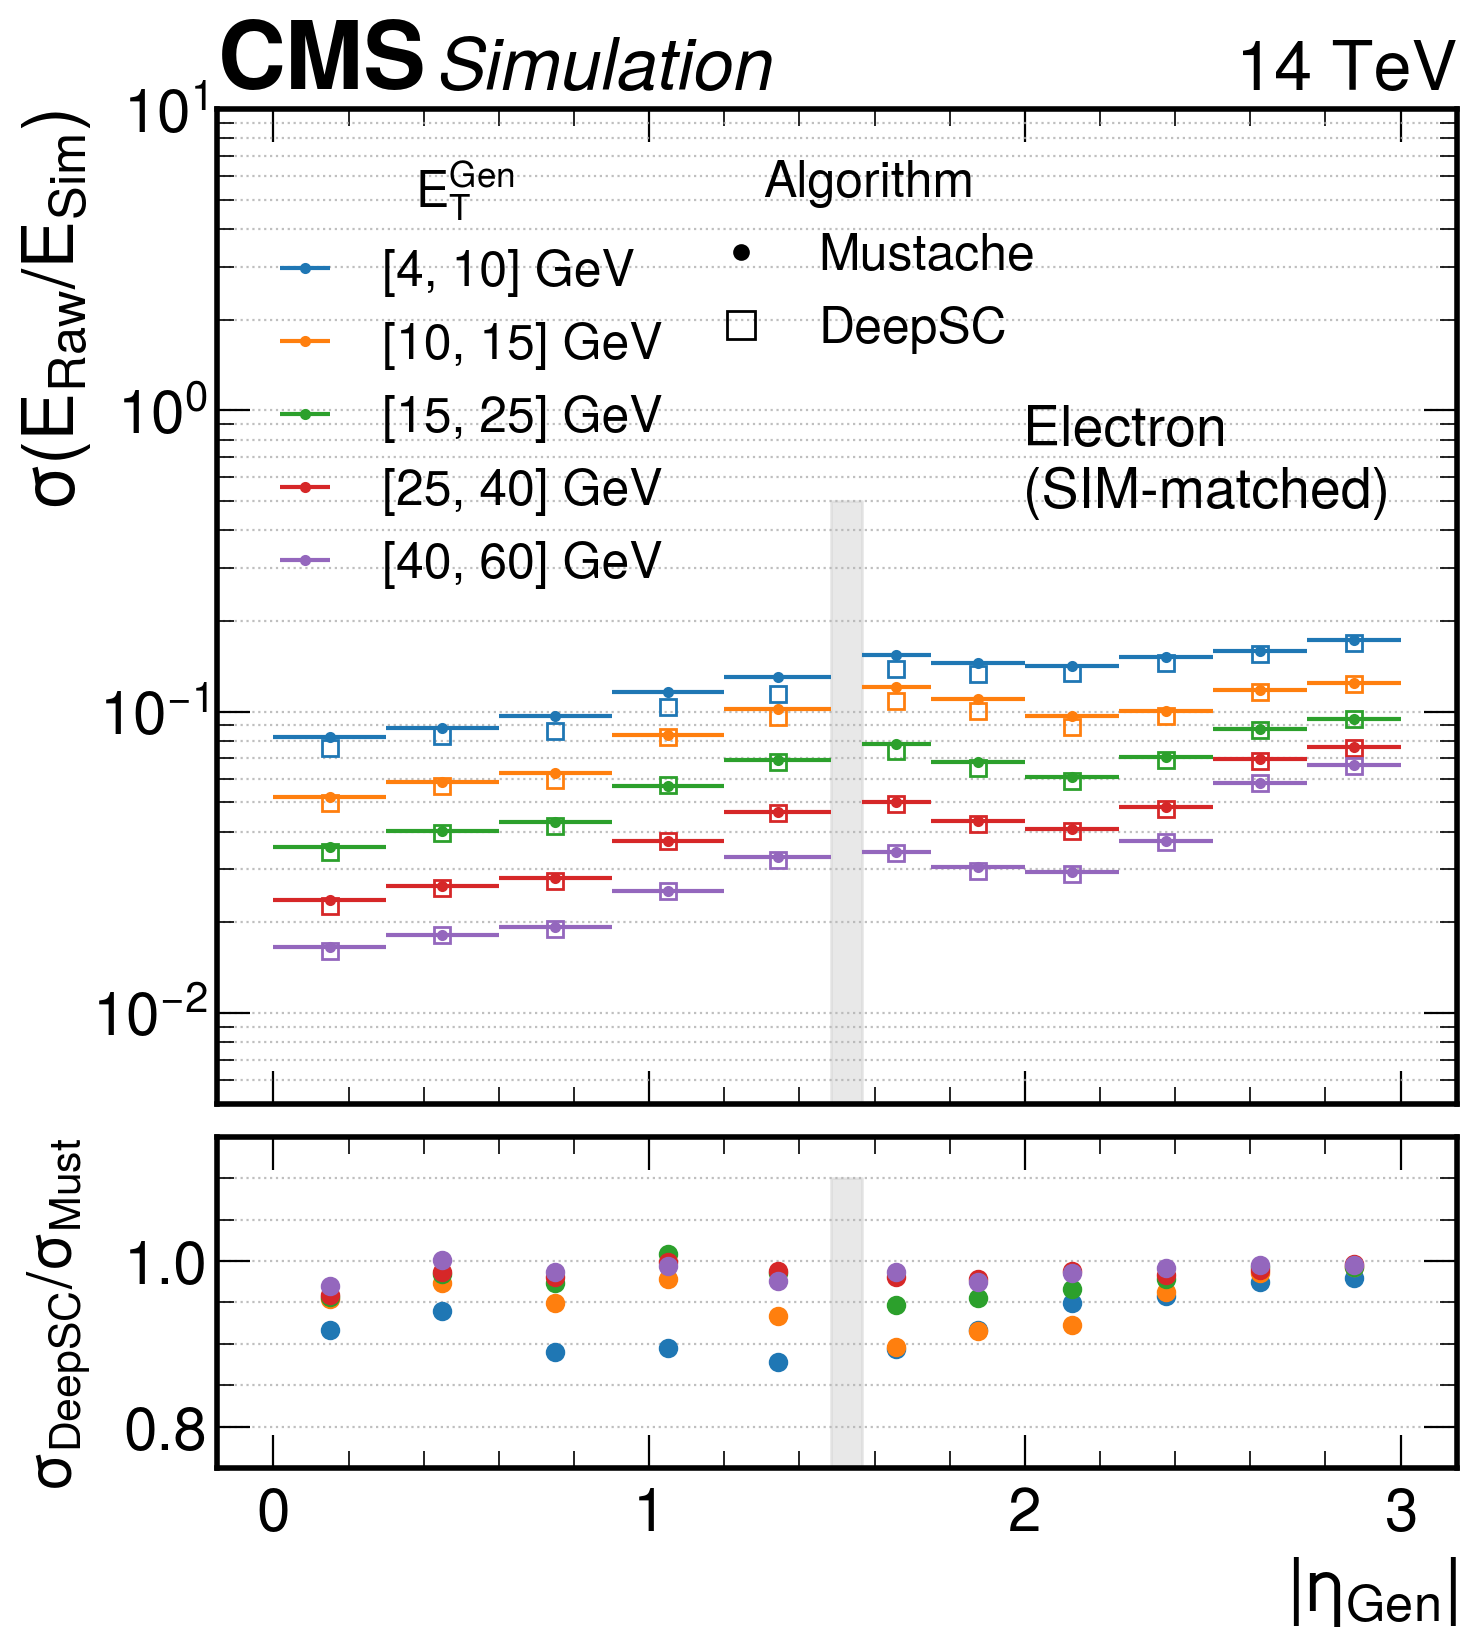

In [16]:
ets = [4,10,15, 25, 40,60]
iplot = [0, 1, 2, 3,4 ]
etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
exclude_bin = 5

name = "ele_sim_matched_raw"
flavour = "Electron \n(SIM-matched)"
df_m1 = df_m_msim
df_d1 = df_d_msim
res_var = "Eraw_ov_Esim"
res_label = "$\sigma (E_{Raw}/E_{Sim})$"

for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res[res.et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin==iet].w68 / res_must[res_must.et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel(res_label)

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.75, 1.15)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.65, 0.6, flavour, transform=axs[0].transAxes, fontsize=20)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(name))


/tmp/ipykernel_514/432999517.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_514/432999517.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


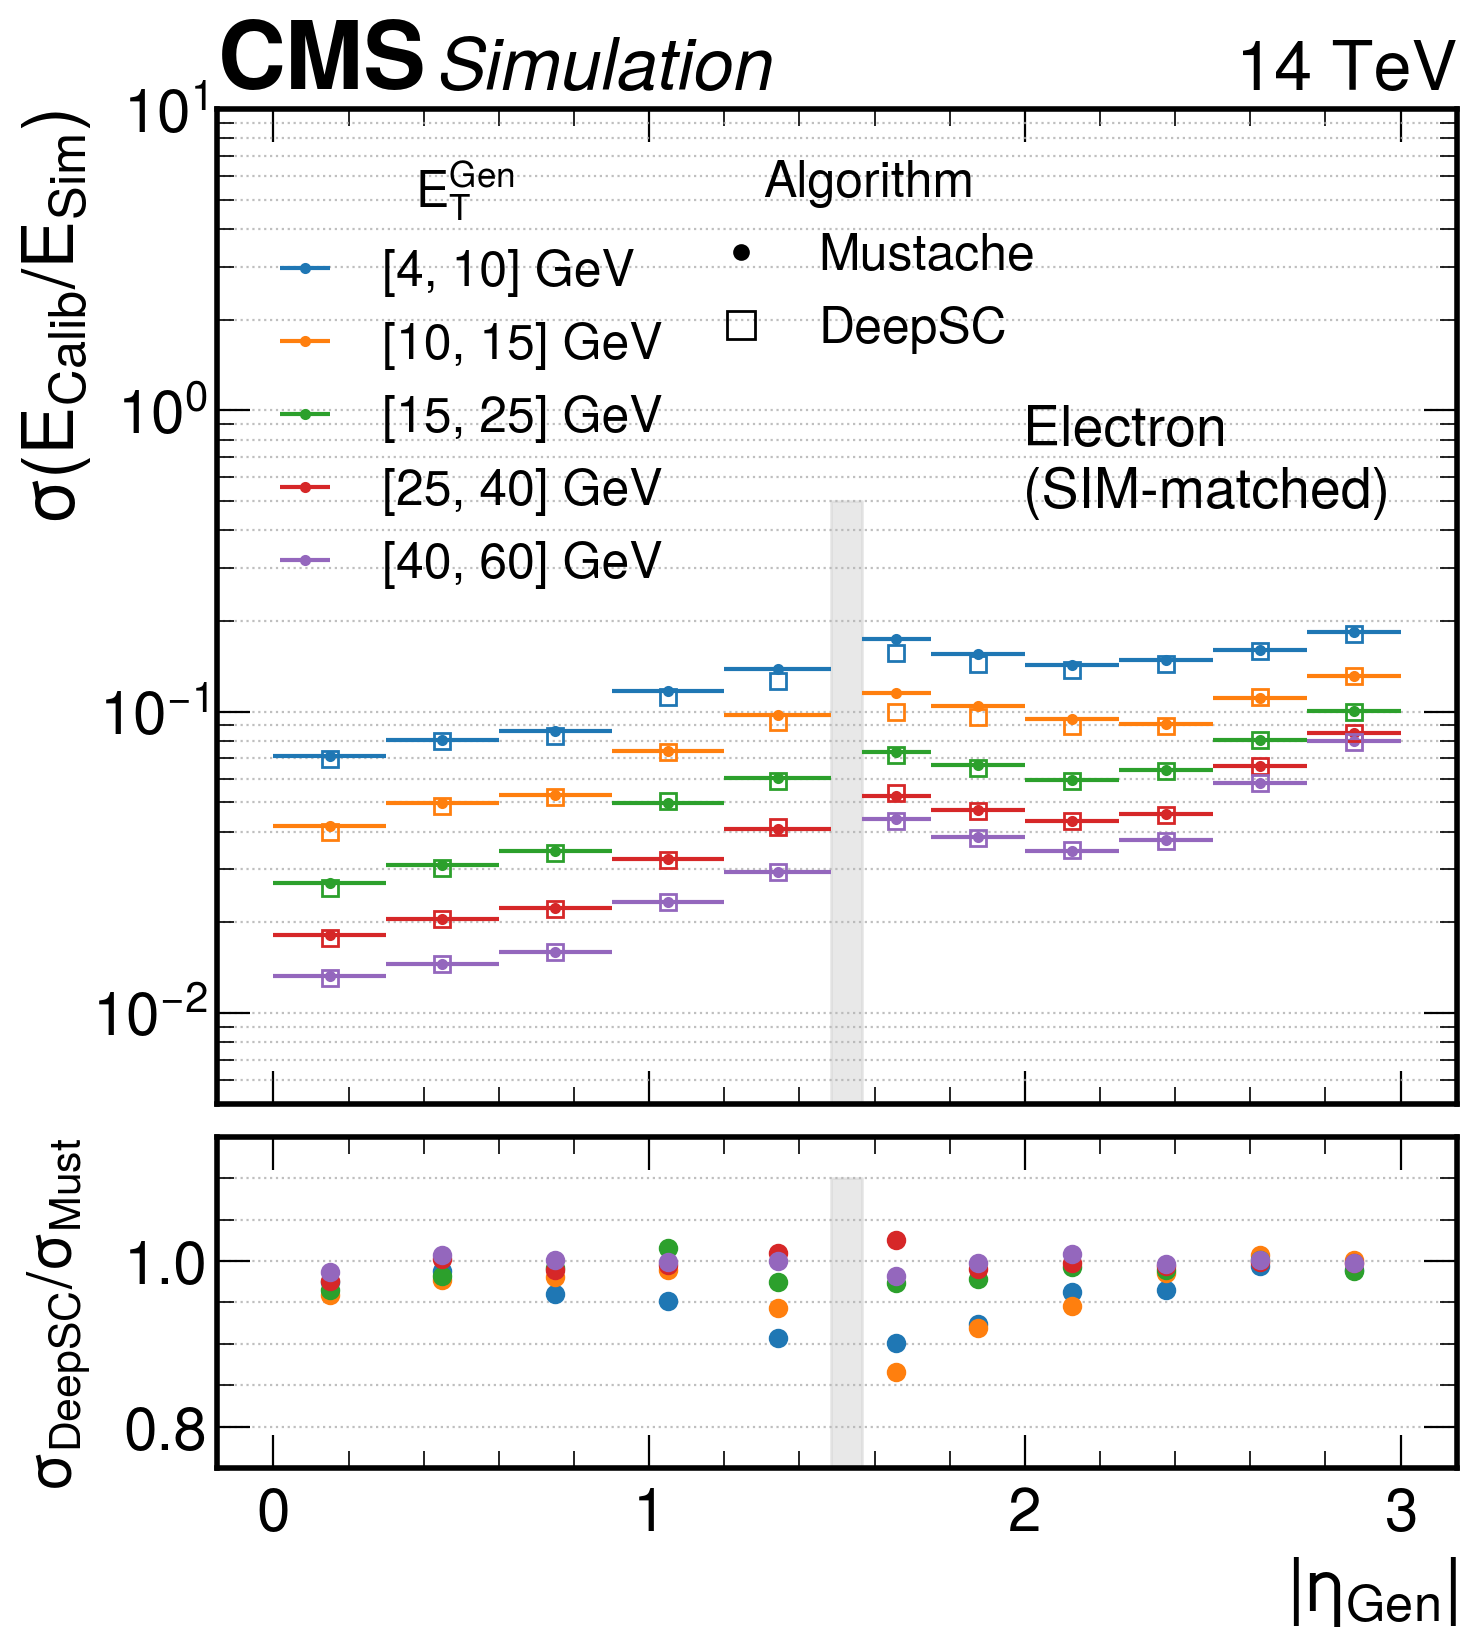

In [17]:
ets = [4,10,15, 25, 40,60]
iplot = [0, 1, 2, 3,4 ]
etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
exclude_bin = 5

name = "ele_sim_matched_corr"
flavour = "Electron \n(SIM-matched)"
df_m1 = df_m_msim
df_d1 = df_d_msim
res_var = "Ecorr_ov_Esim"
res_label = "$\sigma (E_{Calib}/E_{Sim})$"

for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res[res.et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin==iet].w68 / res_must[res_must.et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel(res_label)

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.75, 1.15)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.65, 0.6, flavour, transform=axs[0].transAxes, fontsize=20)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(name))


/tmp/ipykernel_514/566767695.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_514/566767695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


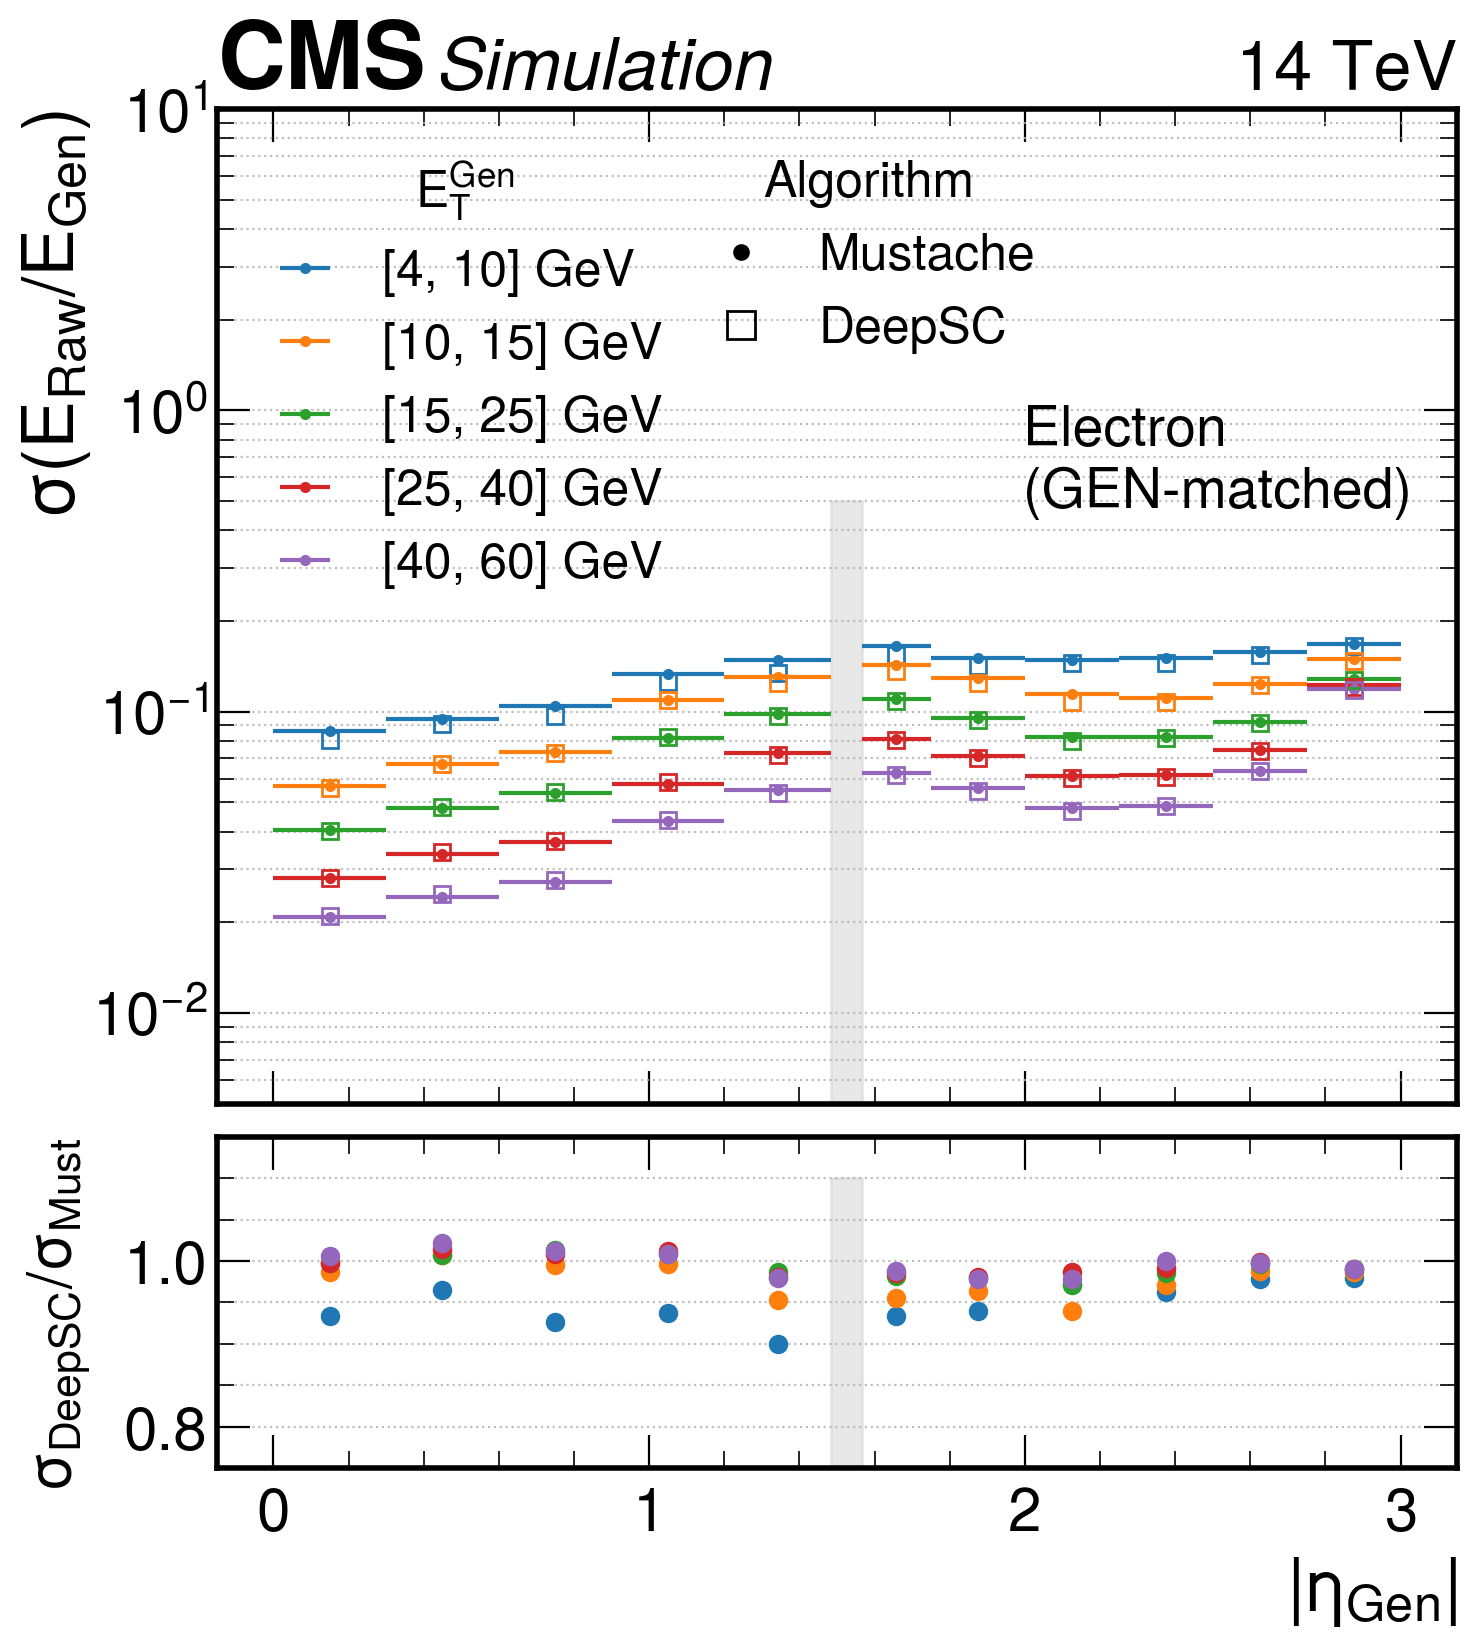

In [18]:
ets = [4,10,15, 25, 40,60]
iplot = [0, 1, 2, 3,4 ]
etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
exclude_bin = 5

name = "ele_gen_matched_raw"
flavour = "Electron \n(GEN-matched)"
df_m1 = df_m_mgen
df_d1 = df_d_mgen
res_var = "Eraw_ov_EGen"
res_label = "$\sigma (E_{Raw}/E_{Gen})$"

for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res[res.et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin==iet].w68 / res_must[res_must.et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel(res_label)

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.75, 1.15)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.65, 0.6, flavour, transform=axs[0].transAxes, fontsize=20)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(name))


/tmp/ipykernel_514/63844928.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_514/63844928.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


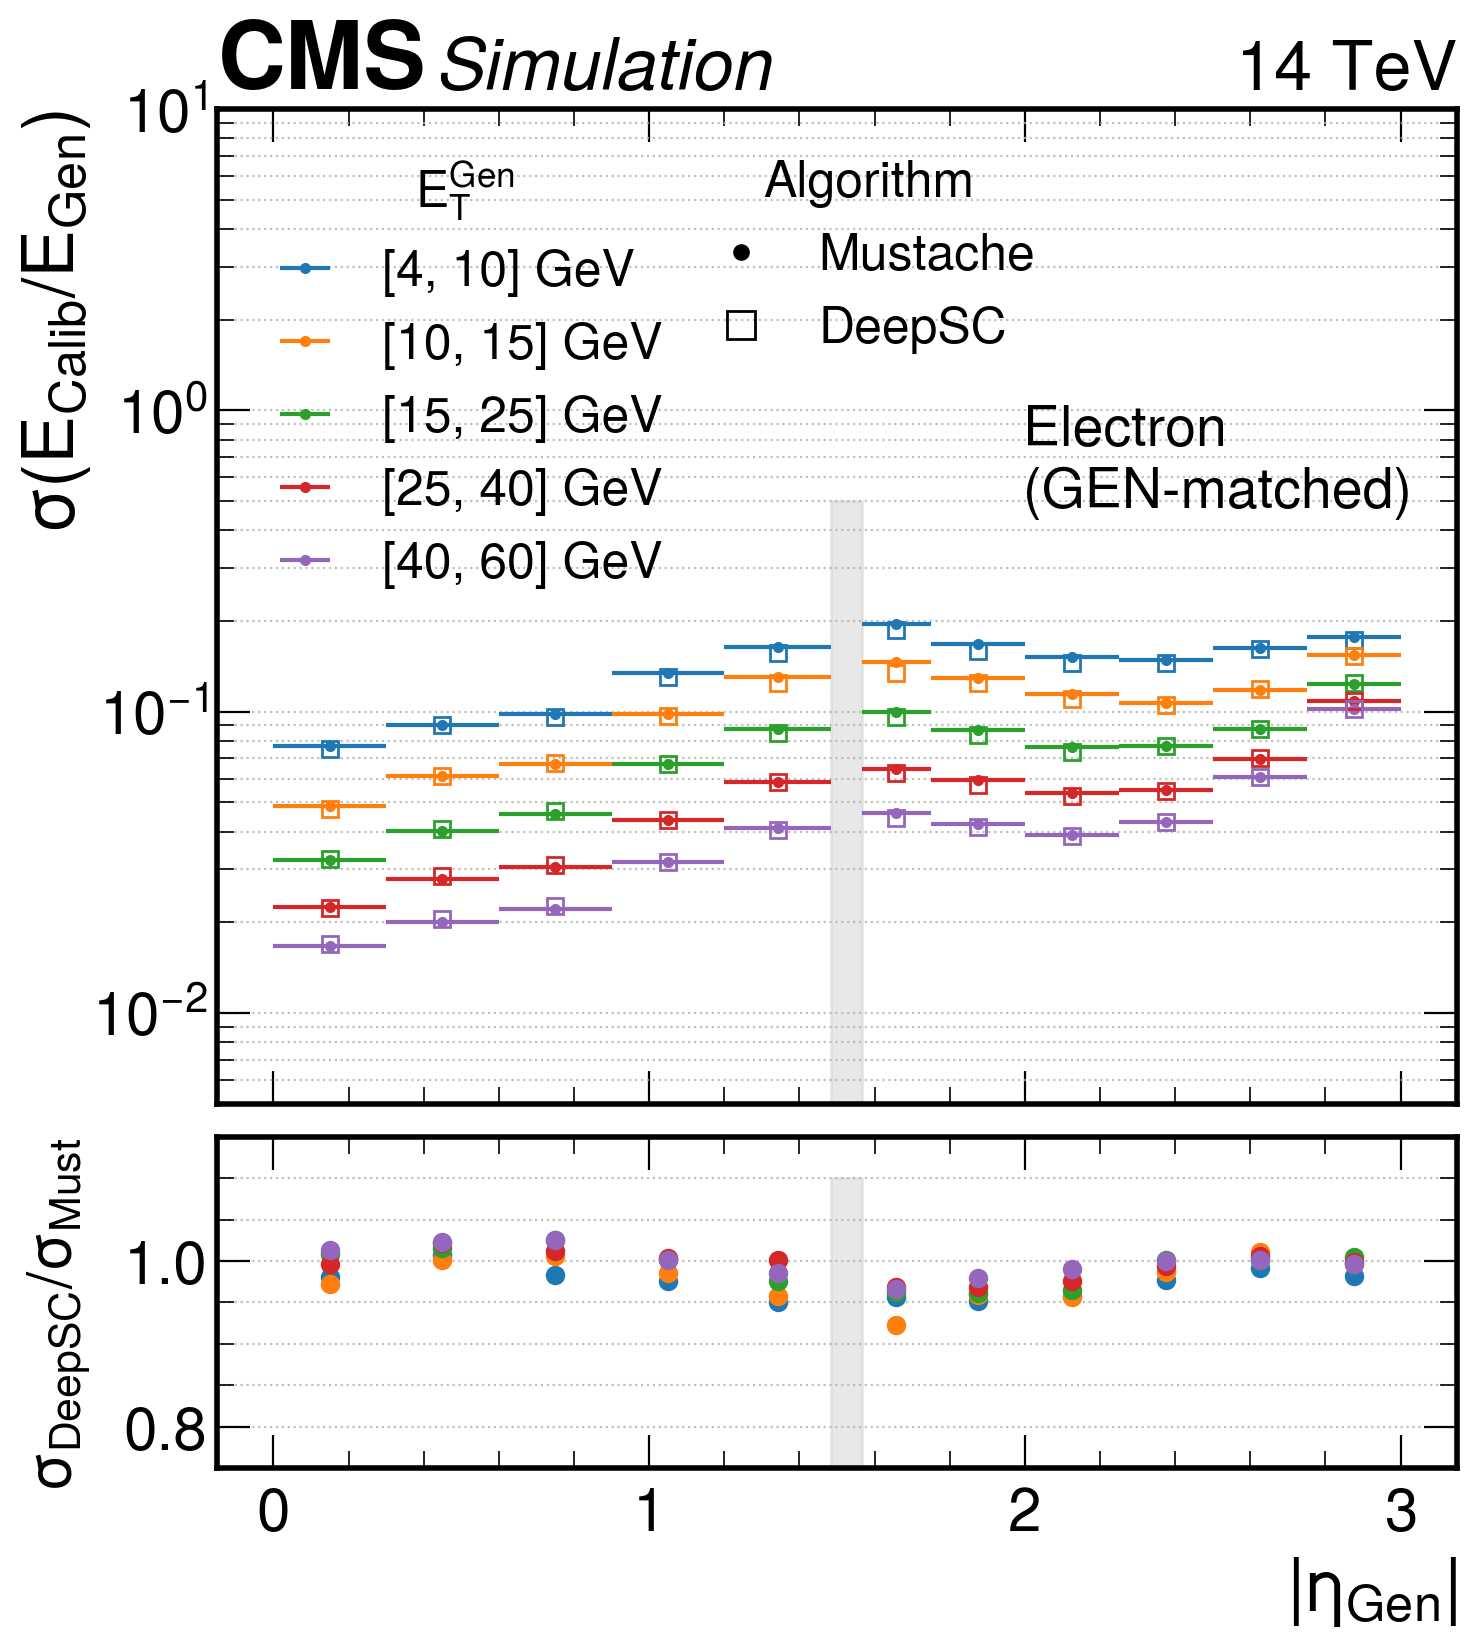

In [19]:
ets = [4,10,15, 25, 40,60]
iplot = [0, 1, 2, 3,4 ]
etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
exclude_bin = 5

name = "ele_gen_matched_corr"
flavour = "Electron \n(GEN-matched)"
df_m1 = df_m_mgen
df_d1 = df_d_mgen
res_var = "Ecorr_ov_EGen"
res_label = "$\sigma (E_{Calib}/E_{Gen})$"

for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.genpart_et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis(res_var))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res[res.et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin==iet].w68 / res_must[res_must.et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel(res_label)

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.75, 1.15)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.65, 0.6, flavour, transform=axs[0].transAxes, fontsize=20)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(name))


# Resolution by PU

array([[<AxesSubplot:title={'center':'obsPU'}>]], dtype=object)

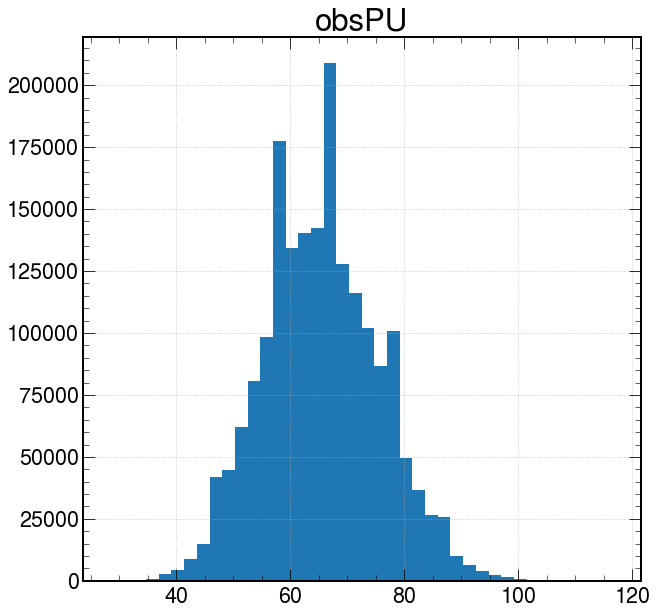

In [20]:
df_d1.hist("obsPU", bins=40)

/tmp/ipykernel_514/1200736154.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nvtx_bin"] = pd.cut(df.obsPU, nvtx, labels=list(range(len(nvtx)-1)))
/tmp/ipykernel_514/1200736154.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))


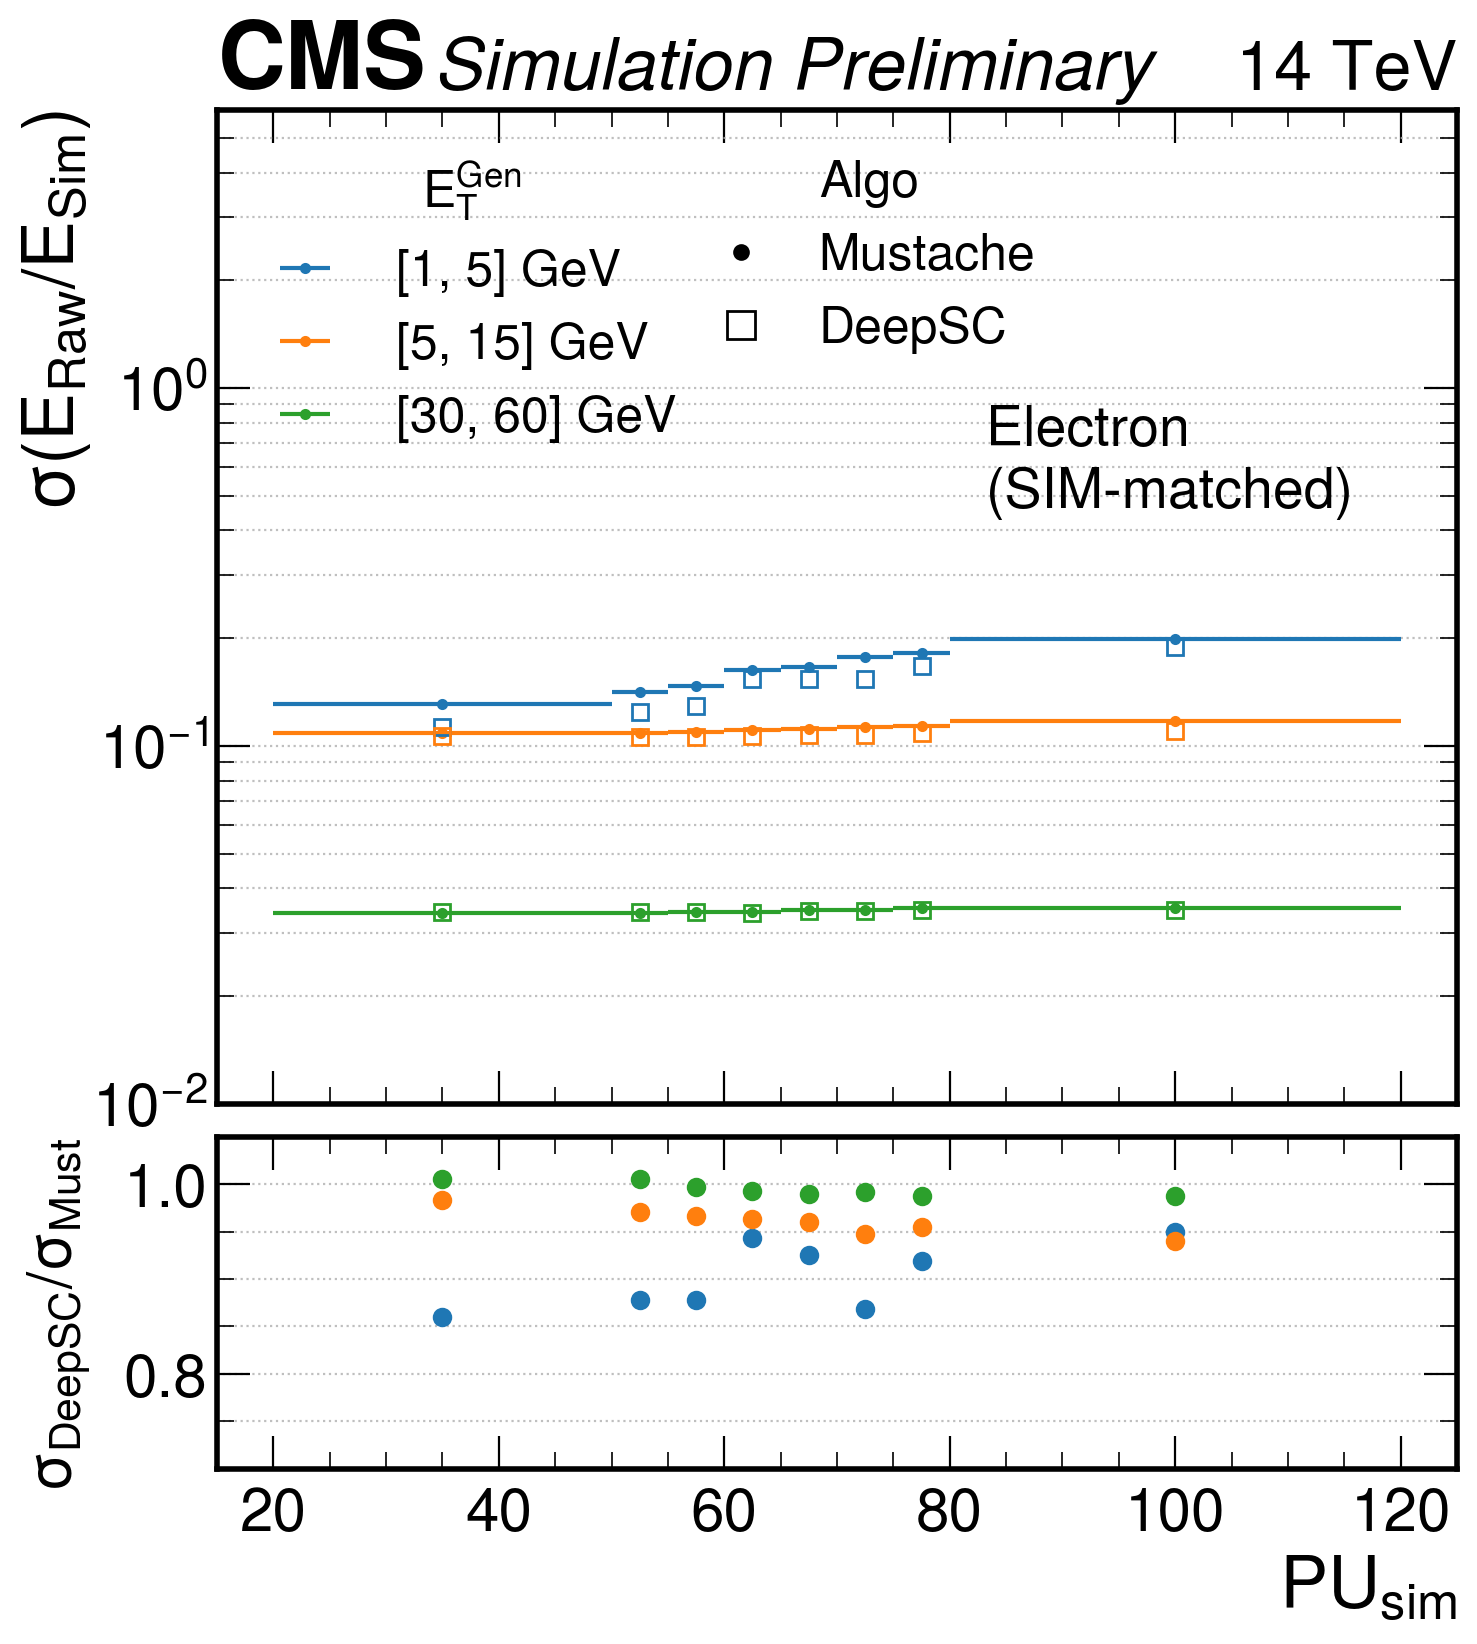

In [21]:
nvtx = [20,50,55,60,65,70,75,80,120]
ets = [1,5,15,30,60]
iplot =[0,1,3]


name = "ele_sim_matched_raw"
flavour = "Electron \n(SIM-matched)"
df_m1 = df_m_msim
df_d1 = df_d_msim
res_var = "Eraw_ov_Esim"
res_label = "$\sigma (E_{Raw}/E_{Sim})$"

for df in [df_m1, df_d1]:
    df["nvtx_bin"] = pd.cut(df.obsPU, nvtx, labels=list(range(len(nvtx)-1)))
    df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
    
res = df_d1.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis(res_var))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
ax, ar = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(nvtx)-1):
    errx.append((nvtx[i+1]- nvtx[i])/2)
    x.append((nvtx[i+1]+ nvtx[i])/2)

mustl = []
deepl = []

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label=" [{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i =0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res[res.et_bin == iet].w68 , xerr=errx,
                label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), marker="s", markerfacecolor='none', 
                c=mustl[i].lines[0].get_color(), linestyle='none', elinewidth=0)
    i+=1
    deepl.append(l)

ax.set_ylim(1e-2, 6)
ax.set_ylabel(res_label)
ax.grid(axis="y", which="both")
ax.get_yaxis().set_label_coords(-0.1,1)
ax.set_yscale("log")

#     ax.legend(ncol=2, fontsize='x-small', loc="upper left", title="Seed $E_T$", title_fontsize="small")
l1= ax.legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
ax.legend(handles=[ml,dl], title="Algo", title_fontsize=18, loc="upper right",bbox_to_anchor=(0.7, 1), fontsize=18)
ax.add_artist(l1)

ax.text(0.62, 0.6, flavour, transform=ax.transAxes,fontsize=20)
hep.cms.label( loc=0, ax=ax, rlabel="14 TeV",llabel="Simulation Preliminary")

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin == iet].w68 / res_must[res_must.et_bin==iet].w68
    ar.errorbar(x, var, xerr=errx, label="$E_T^{Gen}$" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),fmt="o", linestyle='none', elinewidth=0 )

ar.set_ylim(0.7, 1.05)
ar.set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)

ar.get_yaxis().set_label_coords(-0.1,1)

#     ar.legend(ncol=3,prop={'size': 13}, loc="lower left" )

ar.set_xlabel("$PU_{sim}$")
ar.grid(axis="y", which="both")

fig.savefig(output_folder + "/resolution_byPU_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byPU_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byPU_{}_ratio.svg".format(name))


/tmp/ipykernel_514/2116637499.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nvtx_bin"] = pd.cut(df.obsPU, nvtx, labels=list(range(len(nvtx)-1)))
/tmp/ipykernel_514/2116637499.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))


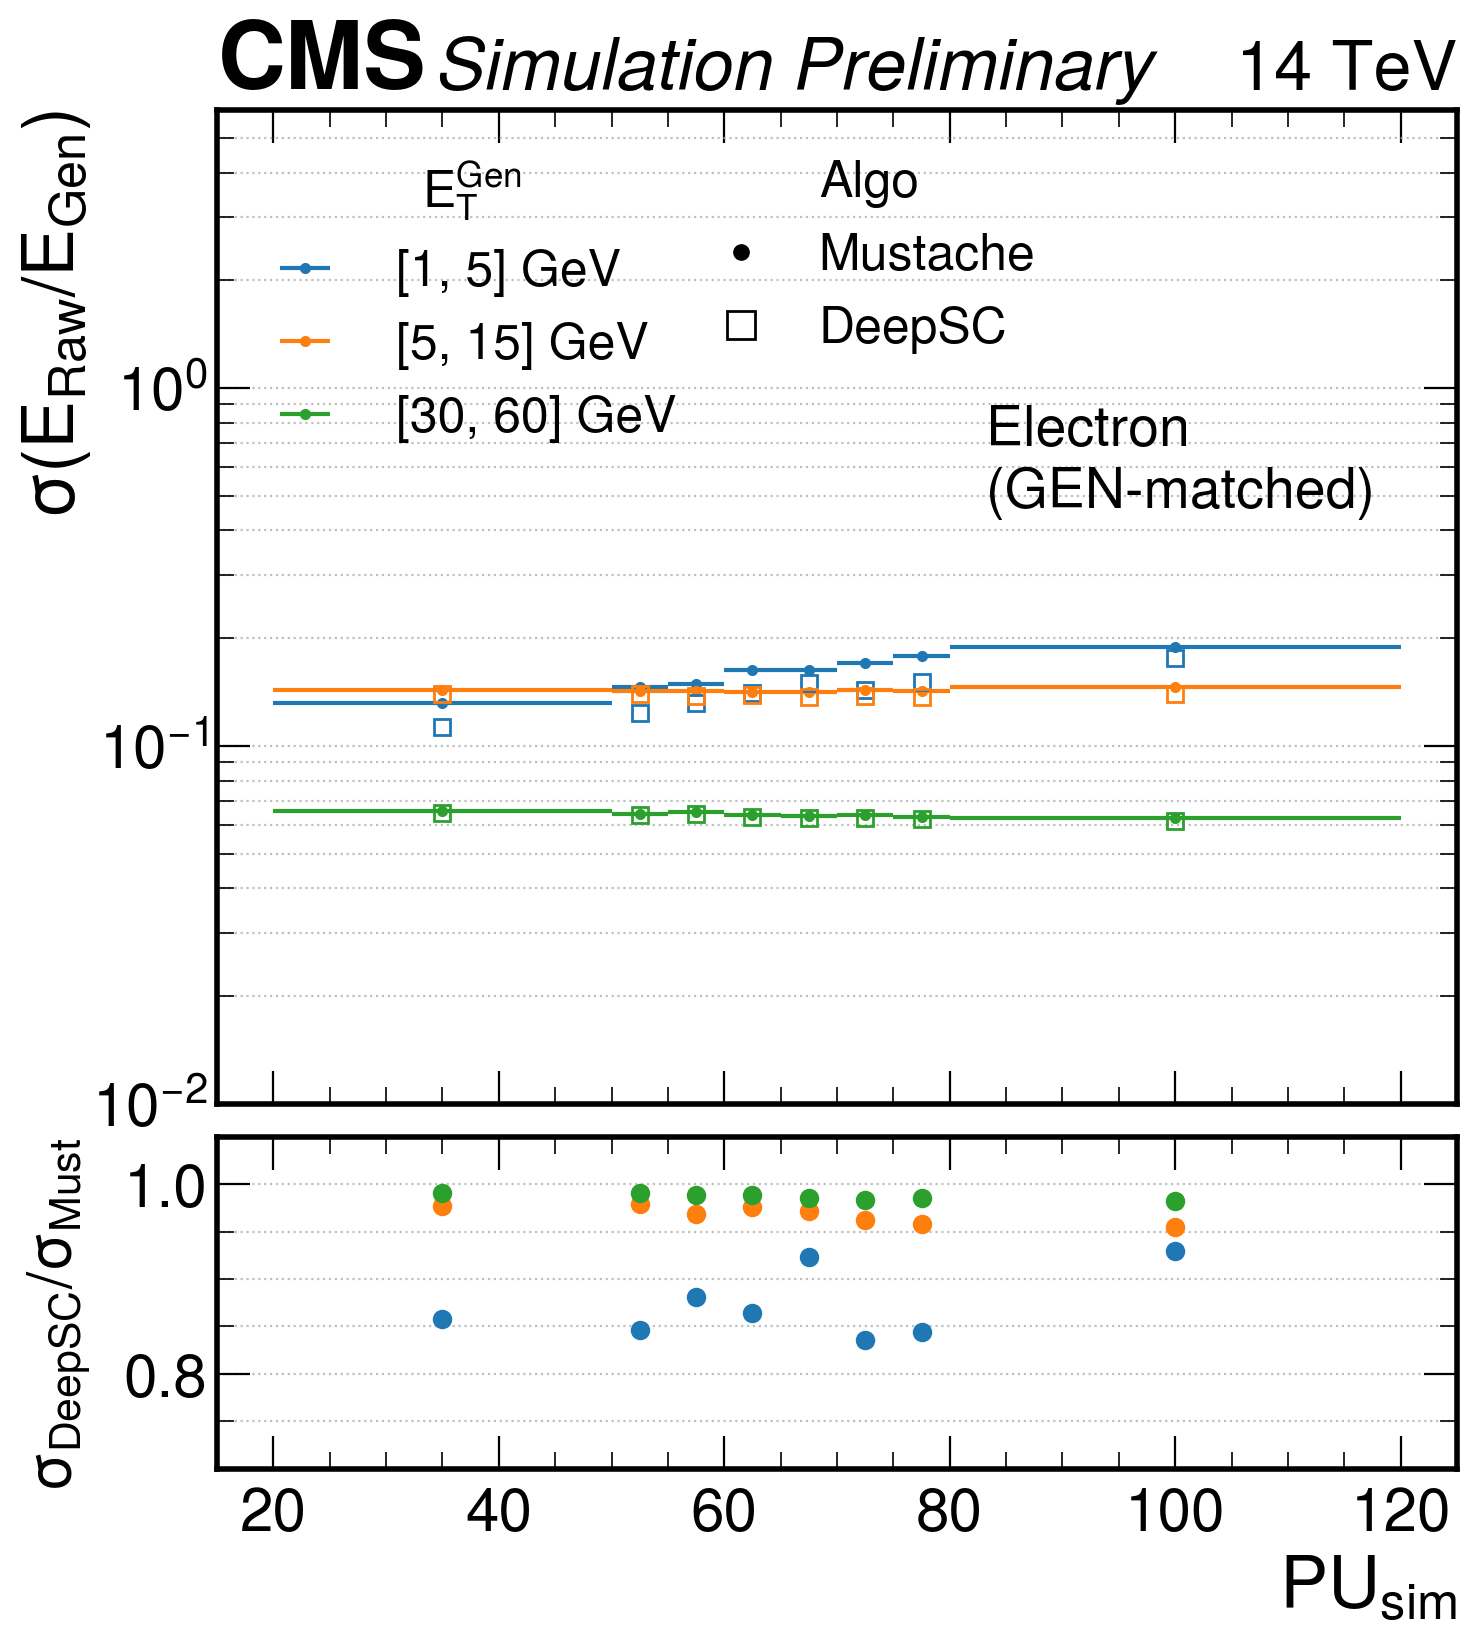

In [22]:
nvtx = [20,50,55,60,65,70,75,80,120]
ets = [1,5,15,30,60]
iplot =[0,1,3]


name = "ele_gen_matched_raw"
flavour = "Electron \n(GEN-matched)"
df_m1 = df_m_mgen
df_d1 = df_d_mgen
res_var = "Eraw_ov_EGen"
res_label = "$\sigma (E_{Raw}/E_{Gen})$"

for df in [df_m1, df_d1]:
    df["nvtx_bin"] = pd.cut(df.obsPU, nvtx, labels=list(range(len(nvtx)-1)))
    df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
    
res = df_d1.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis(res_var))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
ax, ar = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(nvtx)-1):
    errx.append((nvtx[i+1]- nvtx[i])/2)
    x.append((nvtx[i+1]+ nvtx[i])/2)

mustl = []
deepl = []

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label=" [{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i =0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res[res.et_bin == iet].w68 , xerr=errx,
                label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), marker="s", markerfacecolor='none', 
                c=mustl[i].lines[0].get_color(), linestyle='none', elinewidth=0)
    i+=1
    deepl.append(l)

ax.set_ylim(1e-2, 6)
ax.set_ylabel(res_label)
ax.grid(axis="y", which="both")
ax.get_yaxis().set_label_coords(-0.1,1)
ax.set_yscale("log")

#     ax.legend(ncol=2, fontsize='x-small', loc="upper left", title="Seed $E_T$", title_fontsize="small")
l1= ax.legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
ax.legend(handles=[ml,dl], title="Algo", title_fontsize=18, loc="upper right",bbox_to_anchor=(0.7, 1), fontsize=18)
ax.add_artist(l1)

ax.text(0.62, 0.6, flavour, transform=ax.transAxes,fontsize=20)
hep.cms.label( loc=0, ax=ax, rlabel="14 TeV",llabel="Simulation Preliminary")

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin == iet].w68 / res_must[res_must.et_bin==iet].w68
    ar.errorbar(x, var, xerr=errx, label="$E_T^{Gen}$" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),fmt="o", linestyle='none', elinewidth=0 )

ar.set_ylim(0.7, 1.05)
ar.set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)

ar.get_yaxis().set_label_coords(-0.1,1)

#     ar.legend(ncol=3,prop={'size': 13}, loc="lower left" )

ar.set_xlabel("$PU_{sim}$")
ar.grid(axis="y", which="both")

fig.savefig(output_folder + "/resolution_byPU_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byPU_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byPU_{}_ratio.svg".format(name))


/tmp/ipykernel_514/3566234791.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nvtx_bin"] = pd.cut(df.obsPU, nvtx, labels=list(range(len(nvtx)-1)))
/tmp/ipykernel_514/3566234791.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))


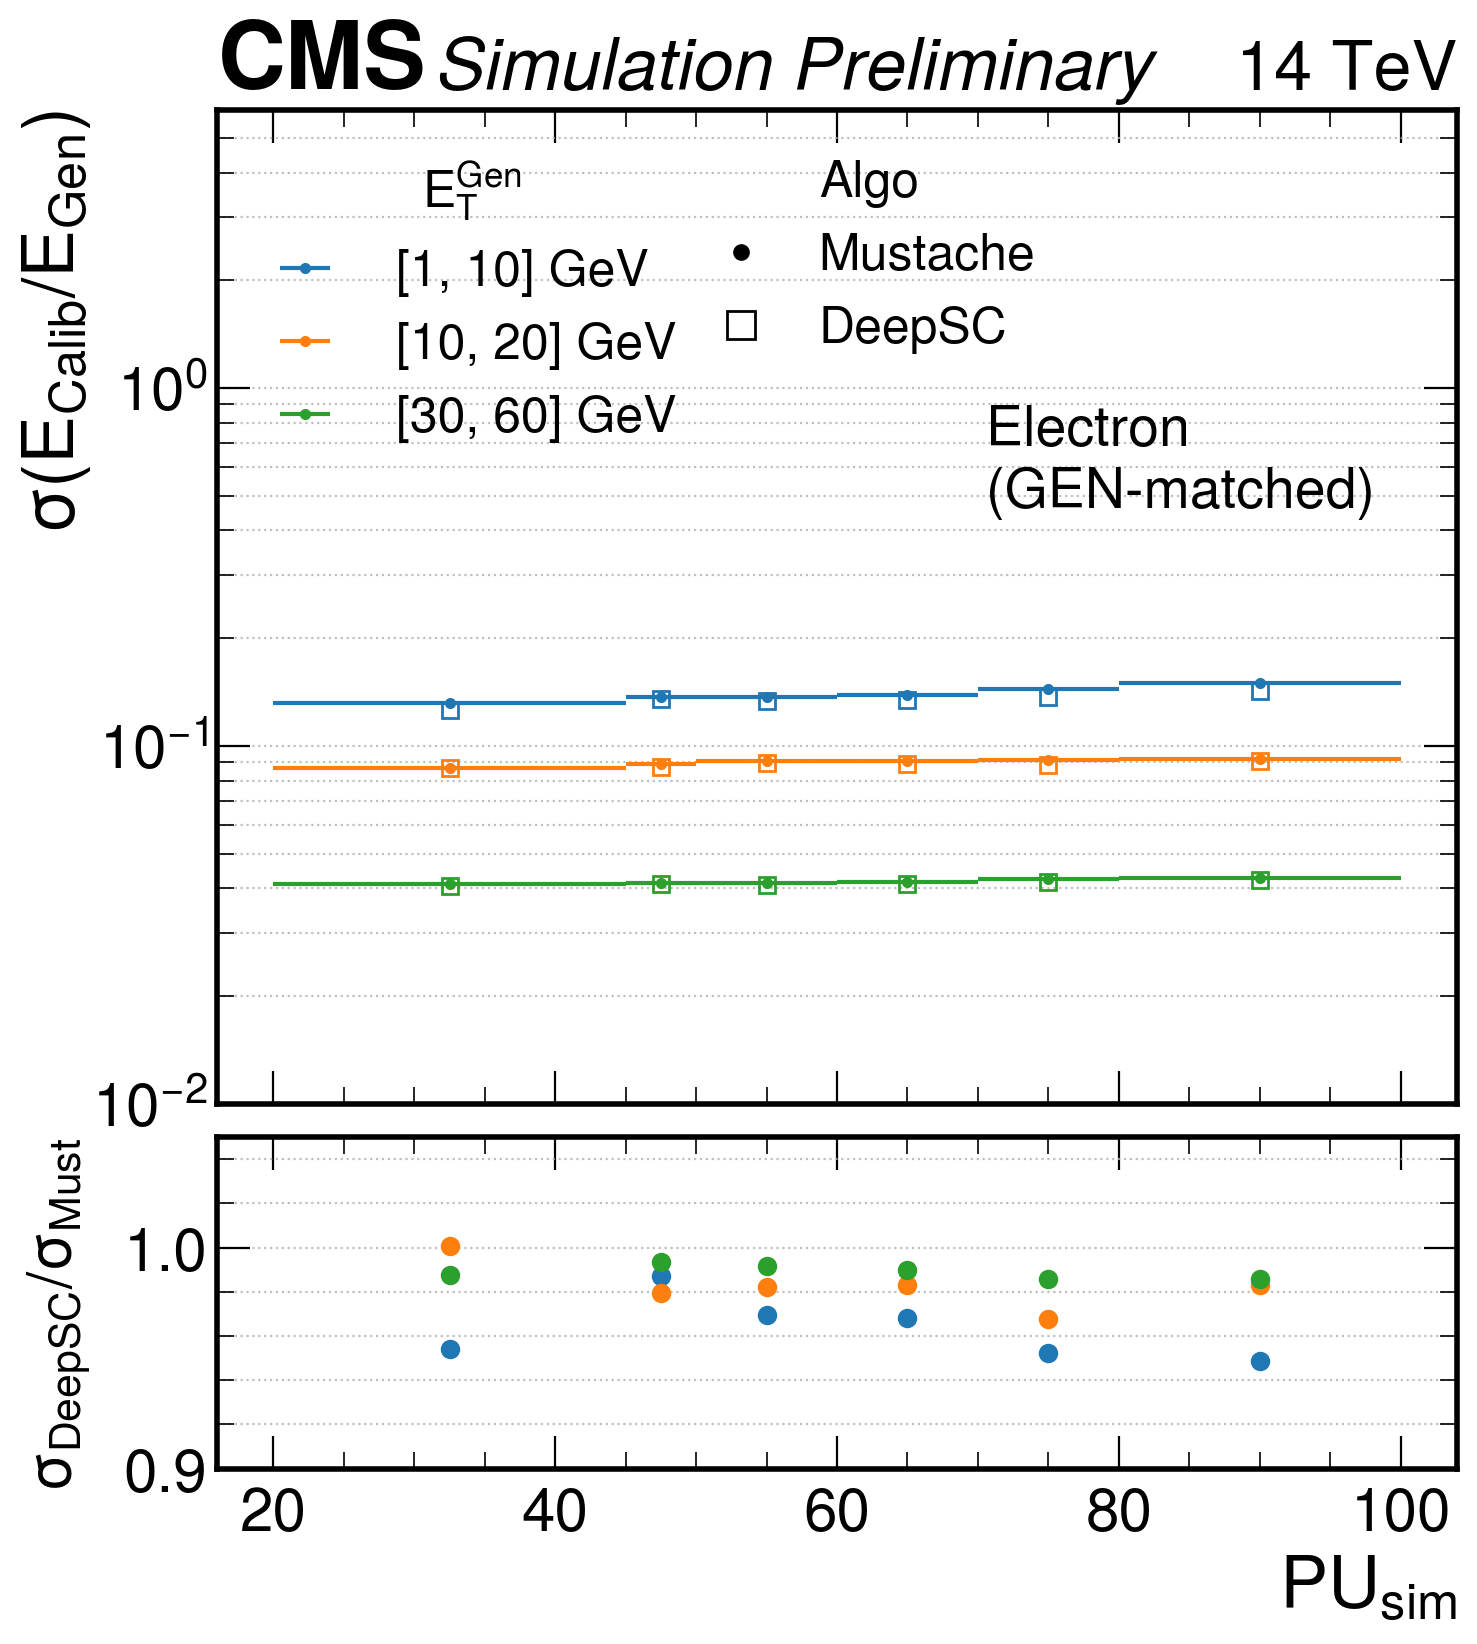

In [23]:
nvtx = [20,45, 50,60,70,80,100]
ets = [1,10,20,30,60]
iplot =[0,1,3]


name = "ele_gen_matched_corr"
flavour = "Electron \n(GEN-matched)"
df_m1 = df_m_mgen
df_d1 = df_d_mgen
res_var = "Ecorr_ov_EGen"
res_label = "$\sigma (E_{Calib}/E_{Gen})$"

for df in [df_m1, df_d1]:
    df["nvtx_bin"] = pd.cut(df.obsPU, nvtx, labels=list(range(len(nvtx)-1)))
    df["et_bin"] = pd.cut(df.calo_et_gen, ets, labels=list(range(len(ets)-1)))
    
res = df_d1.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis(res_var))
res_must = df_m1.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis(res_var))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
ax, ar = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(nvtx)-1):
    errx.append((nvtx[i+1]- nvtx[i])/2)
    x.append((nvtx[i+1]+ nvtx[i])/2)

mustl = []
deepl = []

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label=" [{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i =0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res[res.et_bin == iet].w68 , xerr=errx,
                label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), marker="s", markerfacecolor='none', 
                c=mustl[i].lines[0].get_color(), linestyle='none', elinewidth=0)
    i+=1
    deepl.append(l)

ax.set_ylim(1e-2, 6)
ax.set_ylabel(res_label)
ax.grid(axis="y", which="both")
ax.get_yaxis().set_label_coords(-0.1,1)
ax.set_yscale("log")

#     ax.legend(ncol=2, fontsize='x-small', loc="upper left", title="Seed $E_T$", title_fontsize="small")
l1= ax.legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
ax.legend(handles=[ml,dl], title="Algo", title_fontsize=18, loc="upper right",bbox_to_anchor=(0.7, 1), fontsize=18)
ax.add_artist(l1)

ax.text(0.62, 0.6, flavour, transform=ax.transAxes,fontsize=20)
hep.cms.label( loc=0, ax=ax, rlabel="14 TeV",llabel="Simulation Preliminary")

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin == iet].w68 / res_must[res_must.et_bin==iet].w68
    ar.errorbar(x, var, xerr=errx, label="$E_T^{Gen}$" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),fmt="o", linestyle='none', elinewidth=0 )

ar.set_ylim(0.9, 1.05)
ar.set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)

ar.get_yaxis().set_label_coords(-0.1,1)

#     ar.legend(ncol=3,prop={'size': 13}, loc="lower left" )

ar.set_xlabel("$PU_{sim}$")
ar.grid(axis="y", which="both")

fig.savefig(output_folder + "/resolution_byPU_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byPU_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byPU_{}_ratio.svg".format(name))
